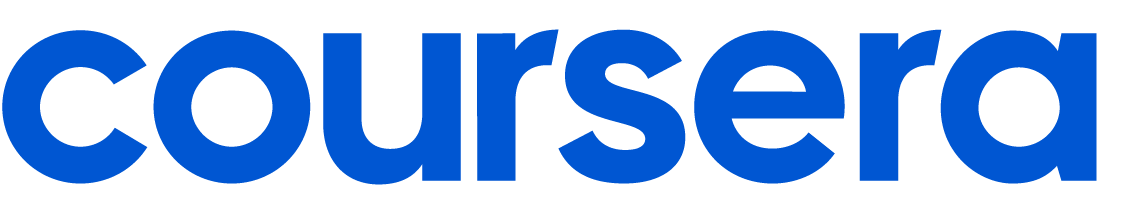

# Welcome to the Data Science Coding Challenge!

Test your skills in a real-world coding challenge. Coding Challenges provide CS & DS Coding Competitions with Prizes and achievement badges!

CS & DS learners want to be challenged as a way to evaluate if they’re job ready. So, why not create fun challenges and give winners something truly valuable such as complimentary access to select Data Science courses, or the ability to receive an achievement badge on their Coursera Skills Profile - highlighting their performance to recruiters.

## Introduction

In this challenge, you'll get the opportunity to tackle one of the most industry-relevant maching learning problems with a unique dataset that will put your modeling skills to the test. Subscription services are leveraged by companies across many industries, from fitness to video streaming to retail. One of the primary objectives of companies with subscription services is to decrease churn and ensure that users are retained as subscribers. In order to do this efficiently and systematically, many companies employ machine learning to predict which users are at the highest risk of churn, so that proper interventions can be effectively deployed to the right audience.

In this challenge, we will be tackling the churn prediction problem on a very unique and interesting group of subscribers on a video streaming service! 

Imagine that you are a new data scientist at this video streaming company and you are tasked with building a model that can predict which existing subscribers will continue their subscriptions for another month. We have provided a dataset that is a sample of subscriptions that were initiated in 2021, all snapshotted at a particular date before the subscription was cancelled. Subscription cancellation can happen for a multitude of reasons, including:
* the customer completes all content they were interested in, and no longer need the subscription
* the customer finds themselves to be too busy and cancels their subscription until a later time
* the customer determines that the streaming service is not the best fit for them, so they cancel and look for something better suited

Regardless the reason, this video streaming company has a vested interest in understanding the likelihood of each individual customer to churn in their subscription so that resources can be allocated appropriately to support customers. In this challenge, you will use your machine learning toolkit to do just that!

## Understanding the Datasets

### Train vs. Test
In this competition, you’ll gain access to two datasets that are samples of past subscriptions of a video streaming platform that contain information about the customer, the customers streaming preferences, and their activity in the subscription thus far. One dataset is titled `train.csv` and the other is titled `test.csv`.

`train.csv` contains 70% of the overall sample (243,787 subscriptions to be exact) and importantly, will reveal whether or not the subscription was continued into the next month (the “ground truth”).

The `test.csv` dataset contains the exact same information about the remaining segment of the overall sample (104,480 subscriptions to be exact), but does not disclose the “ground truth” for each subscription. It’s your job to predict this outcome!

Using the patterns you find in the `train.csv` data, predict whether the subscriptions in `test.csv` will be continued for another month, or not.

### Dataset descriptions
Both `train.csv` and `test.csv` contain one row for each unique subscription. For each subscription, a single observation (`CustomerID`) is included during which the subscription was active. 

In addition to this identifier column, the `train.csv` dataset also contains the target label for the task, a binary column `Churn`.

Besides that column, both datasets have an identical set of features that can be used to train your model to make predictions. Below you can see descriptions of each feature. Familiarize yourself with them so that you can harness them most effectively for this machine learning task!

In [271]:
import pandas as pd
data_descriptions = pd.read_csv('data_descriptions.csv')
pd.set_option('display.max_colwidth', None)
pd.set_option('future.no_silent_downcasting', True)
data_descriptions

,Column_name,Column_type,Data_type,Description
0,AccountAge,Feature,integer,The age of the user's account in months.
1,MonthlyCharges,Feature,float,The amount charged to the user on a monthly basis.
2,TotalCharges,Feature,float,The total charges incurred by the user over the account's lifetime.
3,SubscriptionType,Feature,object,"The type of subscription chosen by the user (Basic, Standard, or Premium)."
4,PaymentMethod,Feature,string,The method of payment used by the user.
5,PaperlessBilling,Feature,string,Indicates whether the user has opted for paperless billing (Yes or No).
6,ContentType,Feature,string,"The type of content preferred by the user (Movies, TV Shows, or Both)."
7,MultiDeviceAccess,Feature,string,Indicates whether the user has access to the service on multiple devices (Yes or No).
8,DeviceRegistered,Feature,string,"The type of device registered by the user (TV, Mobile, Tablet, or Computer)."
9,ViewingHoursPerWeek,Feature,float,The number of hours the user spends watching content per week.


## How to Submit your Predictions to Coursera
Submission Format:

In this notebook you should follow the steps below to explore the data, train a model using the data in `train.csv`, and then score your model using the data in `test.csv`. Your final submission should be a dataframe (call it `prediction_df` with two columns and exactly 104,480 rows (plus a header row). The first column should be `CustomerID` so that we know which prediction belongs to which observation. The second column should be called `predicted_probability` and should be a numeric column representing the __likellihood that the subscription will churn__.

Your submission will show an error if you have extra columns (beyond `CustomerID` and `predicted_probability`) or extra rows. The order of the rows does not matter.

The naming convention of the dataframe and columns are critical for our autograding, so please make sure to use the exact naming conventions of `prediction_df` with column names `CustomerID` and `predicted_probability`!

To determine your final score, we will compare your `predicted_probability` predictions to the source of truth labels for the observations in `test.csv` and calculate the [ROC AUC](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html). We choose this metric because we not only want to be able to predict which subscriptions will be retained, but also want a well-calibrated likelihood score that can be used to target interventions and support most accurately.

## Import Python Modules

First, import the primary modules that will be used in this project. Remember as this is an open-ended project please feel free to make use of any of your favorite libraries that you feel may be useful for this challenge. For example some of the following popular packages may be useful:

- pandas
- numpy
- Scipy
- Scikit-learn
- keras
- maplotlib
- seaborn
- etc, etc

In [10]:
# Import required packages

# Data packages
import pandas as pd
import numpy as np

# Machine Learning / Classification packages
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, \
ConfusionMatrixDisplay, RocCurveDisplay, PrecisionRecallDisplay

from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.dummy import DummyClassifier

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from xgboost import plot_importance

# Visualization Packages
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

## Load the Data

Let's start by loading the dataset `train.csv` into a dataframe `train_df`, and `test.csv` into a dataframe `test_df` and display the shape of the dataframes.

In [12]:
train_df = pd.read_csv("train.csv")
print('train_df Shape:', train_df.shape)
train_df.head()

train_df Shape: (243787, 21)


,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,...,ContentDownloadsPerMonth,GenrePreference,UserRating,SupportTicketsPerMonth,Gender,WatchlistSize,ParentalControl,SubtitlesEnabled,CustomerID,Churn
0,20,11.055215,221.104302,Premium,Mailed check,No,Both,No,Mobile,36.758104,...,10,Sci-Fi,2.176498,4,Male,3,No,No,CB6SXPNVZA,0
1,57,5.175208,294.986882,Basic,Credit card,Yes,Movies,No,Tablet,32.450568,...,18,Action,3.478632,8,Male,23,No,Yes,S7R2G87O09,0
2,73,12.106657,883.785952,Basic,Mailed check,Yes,Movies,No,Computer,7.395160,...,23,Fantasy,4.238824,6,Male,1,Yes,Yes,EASDC20BDT,0
3,32,7.263743,232.439774,Basic,Electronic check,No,TV Shows,No,Tablet,27.960389,...,30,Drama,4.276013,2,Male,24,Yes,Yes,NPF69NT69N,0
4,57,16.953078,966.325422,Premium,Electronic check,Yes,TV Shows,No,TV,20.083397,...,20,Comedy,3.616170,4,Female,0,No,No,4LGYPK7VOL,0


In [14]:
test_df = pd.read_csv("test.csv")
print('test_df Shape:', test_df.shape)
test_df.head()

test_df Shape: (104480, 20)


,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,GenrePreference,UserRating,SupportTicketsPerMonth,Gender,WatchlistSize,ParentalControl,SubtitlesEnabled,CustomerID
0,38,17.869374,679.036195,Premium,Mailed check,No,TV Shows,No,TV,29.126308,122.274031,42,Comedy,3.522724,2,Male,23,No,No,O1W6BHP6RM
1,77,9.912854,763.289768,Basic,Electronic check,Yes,TV Shows,No,TV,36.873729,57.093319,43,Action,2.021545,2,Female,22,Yes,No,LFR4X92X8H
2,5,15.019011,75.095057,Standard,Bank transfer,No,TV Shows,Yes,Computer,7.601729,140.414001,14,Sci-Fi,4.806126,2,Female,22,No,Yes,QM5GBIYODA
3,88,15.357406,1351.451692,Standard,Electronic check,No,Both,Yes,Tablet,35.586430,177.002419,14,Comedy,4.943900,0,Female,23,Yes,Yes,D9RXTK2K9F
4,91,12.406033,1128.949004,Standard,Credit card,Yes,TV Shows,Yes,Tablet,23.503651,70.308376,6,Drama,2.846880,6,Female,0,No,No,ENTCCHR1LR


## Explore, Clean, Validate, and Visualize the Data

Feel free to explore, clean, validate, and visualize the data however you see fit for this competition to help determine or optimize your predictive model. Please note - the final autograding will only be on the accuracy of the `prediction_df` predictions.

In [279]:
print(train_df.info())
print()
print(test_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243787 entries, 0 to 243786
Data columns (total 21 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   AccountAge                243787 non-null  int64  
 1   MonthlyCharges            243787 non-null  float64
 2   TotalCharges              243787 non-null  float64
 3   SubscriptionType          243787 non-null  object 
 4   PaymentMethod             243787 non-null  object 
 5   PaperlessBilling          243787 non-null  object 
 6   ContentType               243787 non-null  object 
 7   MultiDeviceAccess         243787 non-null  object 
 8   DeviceRegistered          243787 non-null  object 
 9   ViewingHoursPerWeek       243787 non-null  float64
 10  AverageViewingDuration    243787 non-null  float64
 11  ContentDownloadsPerMonth  243787 non-null  int64  
 12  GenrePreference           243787 non-null  object 
 13  UserRating                243787 non-null  f

In [280]:
train_df.describe()

,AccountAge,MonthlyCharges,TotalCharges,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,UserRating,SupportTicketsPerMonth,WatchlistSize,Churn
count,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000
mean,60.083758,12.490695,750.741017,20.502179,92.264061,24.503513,3.002713,4.504186,12.018508,0.181232
std,34.285143,4.327615,523.073273,11.243753,50.505243,14.421174,1.155259,2.872548,7.193034,0.385211
min,1.000000,4.990062,4.991154,1.000065,5.000547,0.000000,1.000007,0.000000,0.000000,0.000000
25%,30.000000,8.738543,329.147027,10.763953,48.382395,12.000000,2.000853,2.000000,6.000000,0.000000
50%,60.000000,12.495555,649.878487,20.523116,92.249992,24.000000,3.002261,4.000000,12.000000,0.000000
75%,90.000000,16.238160,1089.317362,30.219396,135.908048,37.000000,4.002157,7.000000,18.000000,0.000000
max,119.000000,19.989957,2378.723844,39.999723,179.999275,49.000000,4.999989,9.000000,24.000000,1.000000


**Checking missing values**

In [282]:
print("Number of missing values in 'train_df':")
print(train_df.isna().sum())
print()
print("Number of missing values in 'test_df':")
print(test_df.isna().sum())

Number of missing values in 'train_df':
AccountAge                  0
MonthlyCharges              0
TotalCharges                0
SubscriptionType            0
PaymentMethod               0
PaperlessBilling            0
ContentType                 0
MultiDeviceAccess           0
DeviceRegistered            0
ViewingHoursPerWeek         0
AverageViewingDuration      0
ContentDownloadsPerMonth    0
GenrePreference             0
UserRating                  0
SupportTicketsPerMonth      0
Gender                      0
WatchlistSize               0
ParentalControl             0
SubtitlesEnabled            0
CustomerID                  0
Churn                       0
dtype: int64

Number of missing values in 'test_df':
AccountAge                  0
MonthlyCharges              0
TotalCharges                0
SubscriptionType            0
PaymentMethod               0
PaperlessBilling            0
ContentType                 0
MultiDeviceAccess           0
DeviceRegistered            0
Viewing

There are no missing values in the both datasets.

**Cleaning data**

Two variables have values which include space characters ' '. In order to avoid future problems, I would be best to replace the space characters with underscores before I continue with modeling. 
The identified variables with blank characters among its possible values are: 'PaymentMethod' and 'ContentType'.
 

In [286]:
# Check the possible values of 'PaymentMethod' variable
print(train_df['PaymentMethod'].value_counts())
print(test_df['PaymentMethod'].value_counts())

PaymentMethod
Electronic check    61313
Credit card         60924
Bank transfer       60797
Mailed check        60753
Name: count, dtype: int64
PaymentMethod
Mailed check        26166
Credit card         26134
Electronic check    26127
Bank transfer       26053
Name: count, dtype: int64


This variable can have 4 different values, all with space characters.
Let's replace them with underscores, and check the outcome.

In [288]:
replacements = {'Electronic check':'ElectronicCheck', 'Credit card':'CreditCard',
                'Bank transfer':'BankTransfer', 'Mailed check':'MailedCheck'}

train_df.replace(replacements, inplace=True)
test_df.replace(replacements, inplace=True)

print(train_df['PaymentMethod'].value_counts())
print(test_df['PaymentMethod'].value_counts())

PaymentMethod
ElectronicCheck    61313
CreditCard         60924
BankTransfer       60797
MailedCheck        60753
Name: count, dtype: int64
PaymentMethod
MailedCheck        26166
CreditCard         26134
ElectronicCheck    26127
BankTransfer       26053
Name: count, dtype: int64


In [289]:
# Check the possible values of 'ContentType' variable
print(train_df['ContentType'].value_counts())
print(test_df['ContentType'].value_counts())

ContentType
Both        81737
TV Shows    81145
Movies      80905
Name: count, dtype: int64
ContentType
Both        35087
Movies      34848
TV Shows    34545
Name: count, dtype: int64


In [290]:
# Change the 'TV Shows' value to 'TV_Shows' and check the outcome
replacement = {'TV Shows':'TVShows'}

train_df.replace(replacement, inplace=True)
test_df.replace(replacement, inplace=True)

print(train_df['ContentType'].value_counts())
print(test_df['ContentType'].value_counts())

ContentType
Both       81737
TVShows    81145
Movies     80905
Name: count, dtype: int64
ContentType
Both       35087
Movies     34848
TVShows    34545
Name: count, dtype: int64


**Outliers in continuos variables**
No matter that tree-based models are resistant to outliers, I will replace them with values in order not to skew the process of learning.

In [292]:
train_df['AccountAge'].describe()

count    243787.000000
mean         60.083758
std          34.285143
min           1.000000
25%          30.000000
50%          60.000000
75%          90.000000
max         119.000000
Name: AccountAge, dtype: float64

60.0


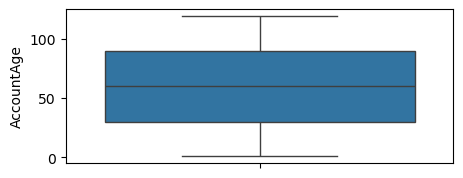

In [293]:
print(train_df['AccountAge'].quantile(0.75) - train_df['AccountAge'].quantile(0.25))
plt.figure(figsize=(5,2))
sns.boxplot(train_df['AccountAge']);

No outliers in 'AccountAge'.

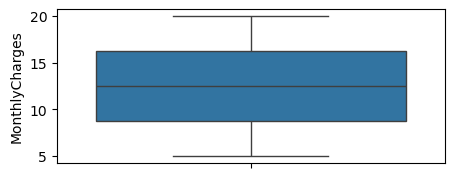

In [295]:
plt.figure(figsize=(5,2))
sns.boxplot(train_df['MonthlyCharges']);

No outliers in 'MonthlyCharges'.

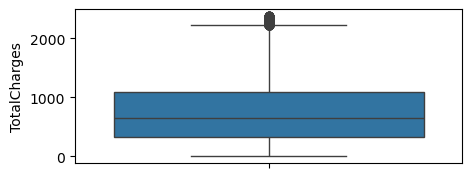

In [297]:
plt.figure(figsize=(5,2))
sns.boxplot(train_df['TotalCharges']);

In [298]:
IQR = train_df['TotalCharges'].quantile(0.75) - train_df['TotalCharges'].quantile(0.25)
print('IQR:', IQR)
lower = train_df['TotalCharges'].quantile(0.25) - 1.5*IQR
print('lower:', lower)
upper = train_df['TotalCharges'].quantile(0.75) + 1.5*IQR
print('upper:', upper)

train_df_filtered = train_df[train_df['TotalCharges']<0]  #check for negative values
print(train_df_filtered.count())
print()
train_df_filtered = train_df[(train_df['TotalCharges']<lower) | (train_df['TotalCharges']>upper)]
print(train_df_filtered.count())
print()
train_df_sorted = train_df_filtered.sort_values(['TotalCharges'], ascending=False)
train_df_filtered = train_df[train_df['TotalCharges']>upper]
print(train_df_filtered.count())

IQR: 760.1703351242627
lower: -811.1084761822483
upper: 2229.5728643148022
AccountAge                  0
MonthlyCharges              0
TotalCharges                0
SubscriptionType            0
PaymentMethod               0
PaperlessBilling            0
ContentType                 0
MultiDeviceAccess           0
DeviceRegistered            0
ViewingHoursPerWeek         0
AverageViewingDuration      0
ContentDownloadsPerMonth    0
GenrePreference             0
UserRating                  0
SupportTicketsPerMonth      0
Gender                      0
WatchlistSize               0
ParentalControl             0
SubtitlesEnabled            0
CustomerID                  0
Churn                       0
dtype: int64

AccountAge                  741
MonthlyCharges              741
TotalCharges                741
SubscriptionType            741
PaymentMethod               741
PaperlessBilling            741
ContentType                 741
MultiDeviceAccess           741
DeviceRegistered         

There is small number of outliers in 'TotalCharges', so I will leave them.

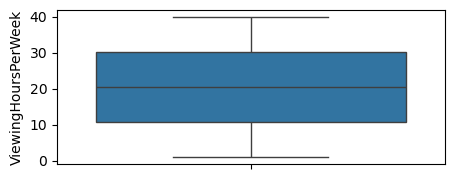

In [300]:
plt.figure(figsize=(5,2))
sns.boxplot(train_df['ViewingHoursPerWeek']);

No outliers in 'ViewingHoursPerWeek'.

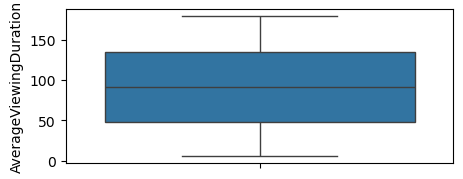

In [302]:
plt.figure(figsize=(5,2))
sns.boxplot(train_df['AverageViewingDuration']);

No outliers in 'AverageViewingDuration'.

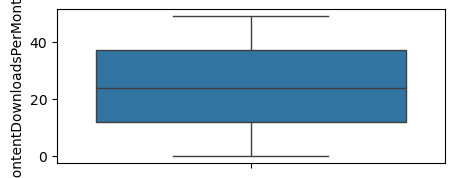

In [304]:
plt.figure(figsize=(5,2))
sns.boxplot(train_df['ContentDownloadsPerMonth']);	

No outliers in 'ContentDownloadsPerMonth'.

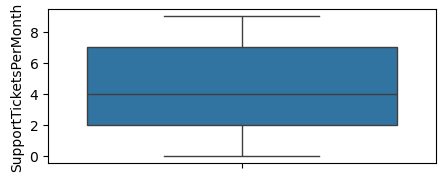

In [306]:
plt.figure(figsize=(5,2))
sns.boxplot(train_df['SupportTicketsPerMonth']);

No outliers in 'SupportTicketsPerMonth'.

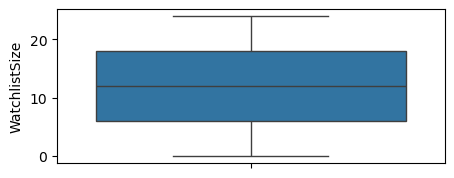

In [308]:
plt.figure(figsize=(5,2))
sns.boxplot(train_df['WatchlistSize']);

No outliers in 'WatchlistSize'.

### **Feature engineering**
Let's combine some features to try to get more predictive power.

**ChurnLabel**

In [16]:
# Create new variable 'ChurnLabel' from the 'Churn' variable with encoded values 0 - Not Churned, and 1 - Churned
train_df['ChurnLabel'] = train_df['Churn'].map({0: 'Not Churned', 1: 'Churned'})

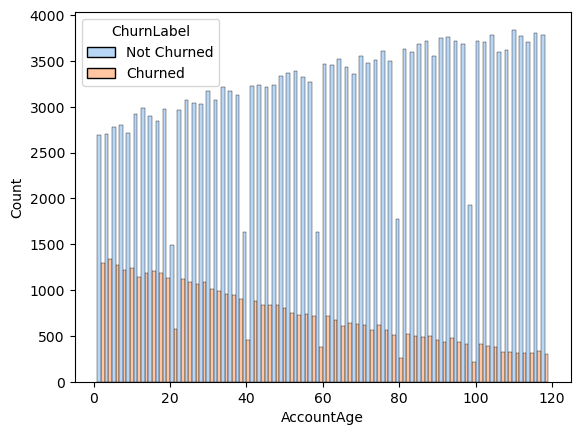

In [18]:
#Plot histplot to examine the average monthly charges per of churned and not-churned users.
sns.histplot(data=train_df, x='AccountAge', hue='ChurnLabel', hue_order=['Not Churned', 'Churned'], legend=True, multiple = 'dodge', palette='pastel')
plt.show()

**Ordinal encode 'SubscriptionType'**

In [315]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder(categories=[['Basic', 'Standard', 'Premium']])

train_df['SubscriptionTypeEncoded'] = ordinal_encoder.fit_transform(train_df[['SubscriptionType']])
train_df = train_df.drop(columns=['SubscriptionType'])

test_df['SubscriptionTypeEncoded'] = ordinal_encoder.fit_transform(test_df[['SubscriptionType']])
test_df = test_df.drop(columns=['SubscriptionType'])

**MonthlyChargesSubscriptionType**

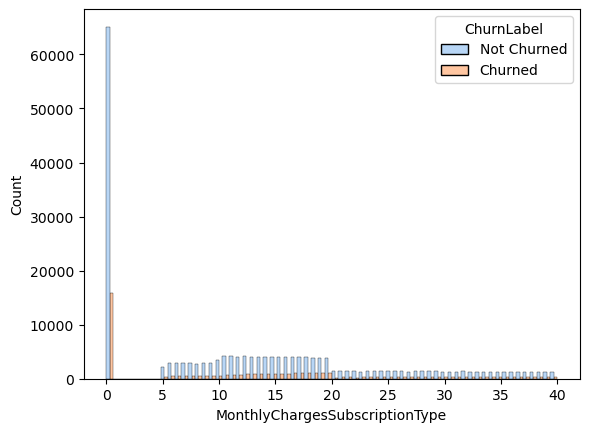

In [317]:
train_df['MonthlyChargesSubscriptionType'] = train_df['MonthlyCharges'] * train_df['SubscriptionTypeEncoded'] 
test_df['MonthlyChargesSubscriptionType'] = test_df['MonthlyCharges'] * test_df['SubscriptionTypeEncoded']

sns.histplot(data=train_df, x='MonthlyChargesSubscriptionType', hue='ChurnLabel', hue_order=['Not Churned', 'Churned'], legend=True, multiple = 'dodge', palette='pastel')
plt.show()

**ChargesPerViewingHoursPerMonth**

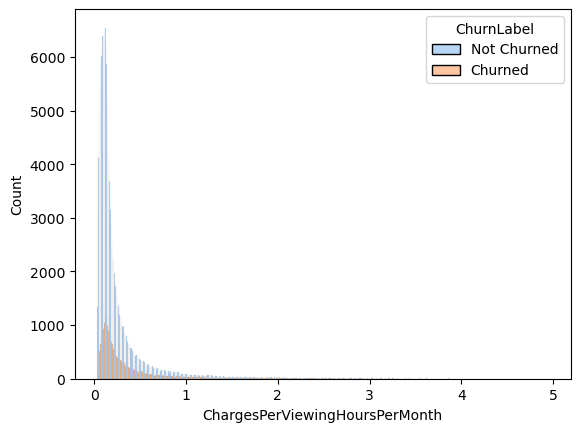

In [319]:
# Create new feature 'ChargesPerViewingHoursPerMonth'
train_df['ChargesPerViewingHoursPerMonth'] = train_df['MonthlyCharges'] / (train_df['ViewingHoursPerWeek'] * 4) 
test_df['ChargesPerViewingHoursPerMonth'] = test_df['MonthlyCharges'] / (test_df['ViewingHoursPerWeek'] * 4)

#Plot histplot to examine the average monthly charges per of churned and not-churned users.
sns.histplot(data=train_df, x='ChargesPerViewingHoursPerMonth', hue='ChurnLabel', hue_order=['Not Churned', 'Churned'], legend=True, multiple = 'dodge', palette='pastel')
plt.show()

The distribution of this feature is heavily skewed to the right, so it is appropriate to apply log transformation on it.

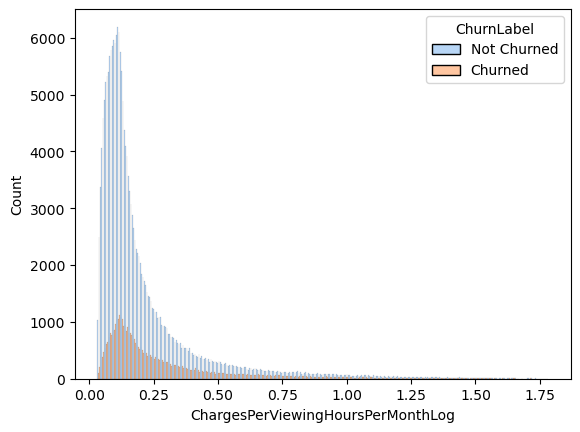

In [321]:
# Apply log trasformation on 'ChargesPerViewingHoursPerMonth'
train_df['ChargesPerViewingHoursPerMonthLog'] = np.log1p(train_df['ChargesPerViewingHoursPerMonth'])
test_df['ChargesPerViewingHoursPerMonthLog'] = np.log1p(test_df['ChargesPerViewingHoursPerMonth'])

# Drop the original feature 'ChargesPerViewingHoursPerMonth' to avoid redundancy
train_df = train_df.drop(columns=['ChargesPerViewingHoursPerMonth'])
test_df = test_df.drop(columns=['ChargesPerViewingHoursPerMonth'])

# Plot histplot on the log feature
sns.histplot(data=train_df, x='ChargesPerViewingHoursPerMonthLog', hue='ChurnLabel', hue_order=['Not Churned', 'Churned'], legend=True, multiple = 'dodge', palette='pastel')
plt.show()


The above histogram shows that the right skewness is maximally reduced. 

In [323]:
# Check for Nan and inf values of the new feature
print('Count of NaN values in the train set:', np.isnan(train_df['ChargesPerViewingHoursPerMonthLog']).sum())
print("Count of NaN values in the test set:", np.isnan(train_df['ChargesPerViewingHoursPerMonthLog']).sum())

print('Count of inf values in the train set:', np.isinf(train_df['ChargesPerViewingHoursPerMonthLog']).sum())
print("Count of inf values in the test set:", np.isinf(train_df['ChargesPerViewingHoursPerMonthLog']).sum())

Count of NaN values in the train set: 0
Count of NaN values in the test set: 0
Count of inf values in the train set: 0
Count of inf values in the test set: 0


In [324]:
numeric_df = train_df.select_dtypes(include=[np.number])

# Now apply np.isinf() only to the numeric columns
inf_mask = np.isinf(numeric_df.values)

# To check if any 'inf' values exist in the entire DataFrame:
has_inf = np.any(inf_mask)

print("Are there any 'inf' values in the dataset?", has_inf)

columns_with_inf = numeric_df.columns[np.any(inf_mask, axis=0)]

print("Columns with 'inf' values:", columns_with_inf.tolist())

Are there any 'inf' values in the dataset? False
Columns with 'inf' values: []


In [325]:
# Check the correlation coefficients
corr_matrix = train_df[['ChargesPerViewingHoursPerMonthLog', 'MonthlyCharges', 'ViewingHoursPerWeek']].corr()
print(corr_matrix)

                                   ChargesPerViewingHoursPerMonthLog  \
ChargesPerViewingHoursPerMonthLog                           1.000000   
MonthlyCharges                                              0.286614   
ViewingHoursPerWeek                                        -0.712546   

                                   MonthlyCharges  ViewingHoursPerWeek  
ChargesPerViewingHoursPerMonthLog        0.286614            -0.712546  
MonthlyCharges                           1.000000            -0.003029  
ViewingHoursPerWeek                     -0.003029             1.000000  


The new feature is correlated with 'ViewingHoursPerWeek' (-0.71) and with 'MonthlyCharges' (0.28)

In [327]:
# Check for Nan and inf values of the new feature
train_df['ChargesPerViewingHoursPerMonthLog'].describe()

count    243787.000000
mean          0.225110
std           0.230746
min           0.030826
25%           0.093627
50%           0.141828
75%           0.255711
max           1.782765
Name: ChargesPerViewingHoursPerMonthLog, dtype: float64

**MonthlyPerTotalChargesRatio** (dropped)

In [329]:
#train_df['MonthlyPerTotalChargesRatio'] = train_df['MonthlyCharges'] / train_df['TotalCharges']
#test_df['MonthlyPerTotalChargesRatio'] = test_df['MonthlyCharges'] / test_df['TotalCharges']

# Craeate a histplot to examine the impact of 'ChargesRatio' on the user churn
#sns.histplot(data=train_df, x='MonthlyPerTotalChargesRatio', hue='ChurnLabel', hue_order=['Not Churned', 'Churned'], legend=True, multiple = 'dodge', palette='pastel')
#plt.show()


The above correlation matrix shows that the new feature is only correlated with 'TotalCharges' (0.82).

**GrowthFactor** (dropped)

In [332]:
# Create new feature 'GrowthFactor'
#train_df['GrowthFactor'] = (train_df['TotalCharges'] - train_df['MonthlyCharges']) / train_df['AccountAge']
#test_df['GrowthFactor'] = (test_df['TotalCharges'] - test_df['MonthlyCharges']) / test_df['AccountAge']

# Craeate a histplot to examine the impact of 'GrowthFactor' on the user churn
#sns.histplot(data=train_df, x='GrowthFactor', hue='ChurnLabel', hue_order=['Not Churned', 'Churned'], legend=True, multiple = 'dodge', palette='pastel')
#plt.show()


The above histplot shows zero number of churned and retained users for growth factor between 0 and 2.5 (users with account age of only one month), and after that the churn raise until growth factor of 5. After that value, the churn slowly raise until growth factor of 17, and fast drops around growth factor of 20.

In [334]:
# Check the correlation coefficients
#corr_matrix = train_df[['GrowthFactor', 'TotalCharges', 'MonthlyCharges', 'AccountAge']].corr()
#print(corr_matrix)

The above correlation matrix shows that the new 'GrowthFactor' feature is extremely high correlated with the 'MonthlyCharges' feature (0.94), with 'TotalCharges' (0.59), and with 'AccountAge' (0.14).

**ChargesDifference**

In [337]:
# Create new feature 'ChargesDifference'
train_df['ChargesDifference'] = train_df['TotalCharges'] - train_df['MonthlyCharges']
test_df['ChargesDifference'] = test_df['TotalCharges'] - test_df['MonthlyCharges']

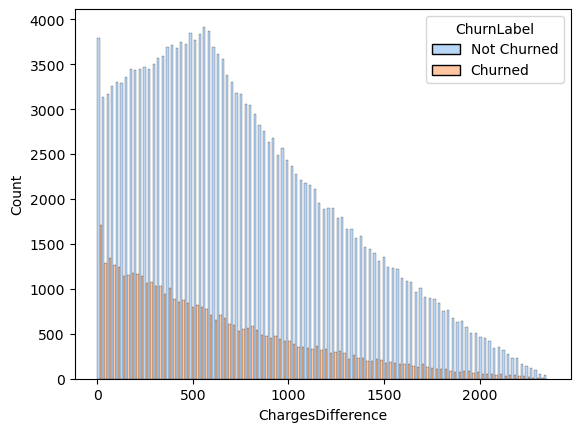

In [338]:
# Craeate a histplot to examine the impact of 'ChargesDifference' on the user churn
sns.histplot(data=train_df, x='ChargesDifference', hue='ChurnLabel', hue_order=['Not Churned', 'Churned'], legend=True, multiple = 'dodge', palette='pastel')
plt.show()

The above histplot shows significant drop of user churned with the increase of the charges difference.

In [340]:
# Check the correlation coefficients
corr_matrix = train_df[['ChargesDifference', 'TotalCharges', 'MonthlyCharges']].corr()
print(corr_matrix)

                   ChargesDifference  TotalCharges  MonthlyCharges
ChargesDifference           1.000000      0.999974        0.491949
TotalCharges                0.999974      1.000000        0.498207
MonthlyCharges              0.491949      0.498207        1.000000


The above correlation matrix shows that the new feature 'ChargesDifference' is extremely correlated with the 'TotalCharges' feature (0.99), and moderately correlated with the 'MonthlyCharges' feature (0.49).

**NormalizedCharges** (dropped)

In [343]:
# Create new feature 'NormalizedCharges'
#train_df['NormalizedCharges'] = train_df['TotalCharges'] / train_df['AccountAge']
#test_df['NormalizedCharges'] = test_df['TotalCharges'] / test_df['AccountAge']

In [344]:
# Craeate a histplot to examine the impact of 'NormalizedCharges' on the user churn
#sns.histplot(data=train_df, x='NormalizedCharges', hue='ChurnLabel', hue_order=['Not Churned', 'Churned'], legend=True, multiple = 'dodge', palette='pastel')
#plt.show()

**ViewingHoursPerMonthAverageViewingDuration**

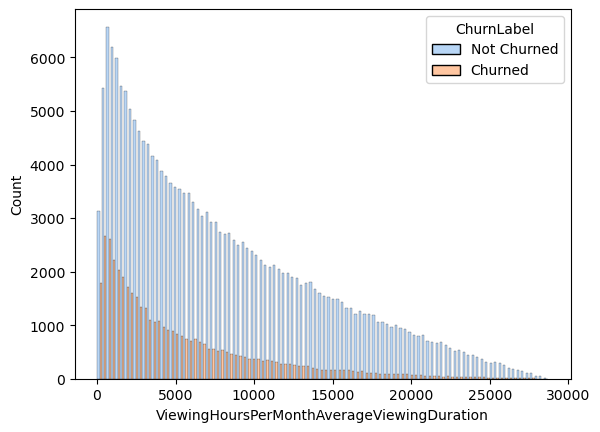

In [346]:
train_df['ViewingHoursPerMonthAverageViewingDuration'] = train_df['ViewingHoursPerWeek'] * 4 * train_df['AverageViewingDuration']
test_df['ViewingHoursPerMonthAverageViewingDuration'] = test_df['ViewingHoursPerWeek'] * 4 * test_df['AverageViewingDuration']

sns.histplot(data=train_df, x='ViewingHoursPerMonthAverageViewingDuration', hue='ChurnLabel', hue_order=['Not Churned', 'Churned'], legend=True, multiple = 'dodge', palette='pastel')
plt.show()

**ContentDownloadsViewingHoursPerMonth**

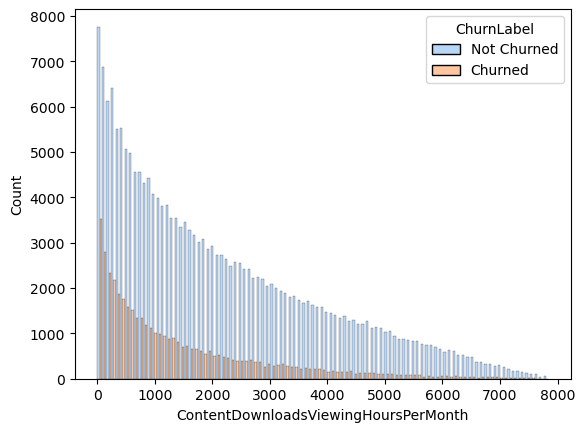

In [348]:
train_df['ContentDownloadsViewingHoursPerMonth'] = train_df['ContentDownloadsPerMonth'] * train_df['ViewingHoursPerWeek'] * 4
test_df['ContentDownloadsViewingHoursPerMonth'] = test_df['ContentDownloadsPerMonth'] * test_df['ViewingHoursPerWeek'] * 4

sns.histplot(data=train_df, x='ContentDownloadsViewingHoursPerMonth', hue='ChurnLabel', hue_order=['Not Churned', 'Churned'], legend=True, multiple = 'dodge', palette='pastel')
plt.show()

In [ ]:
**SupportTicketsPerMonth**

In [32]:
import seaborn as sns
#train_df['SupportTicketsPerMonth'].info()
train_df.groupby(by='SupportTicketsPerMonth')['Churn'].value_counts(normalize=True)
#sns.histplot(data=train_df, x='SupportTicketsPerMonth', hue='ChurnLabel', hue_order=['Not Churned', 'Churned'], legend=True, multiple = 'dodge', palette='pastel')
#plt.show()

SupportTicketsPerMonth  Churn
0                       0        0.866417
                        1        0.133583
1                       0        0.854919
                        1        0.145081
2                       0        0.847980
                        1        0.152020
3                       0        0.838711
                        1        0.161289
4                       0        0.825453
                        1        0.174547
5                       0        0.817250
                        1        0.182750
6                       0        0.803959
                        1        0.196041
7                       0        0.793836
                        1        0.206164
8                       0        0.775615
                        1        0.224385
9                       0        0.764027
                        1        0.235973
Name: proportion, dtype: float64

**SupportTicketsPerViewingHoursPerMonth**

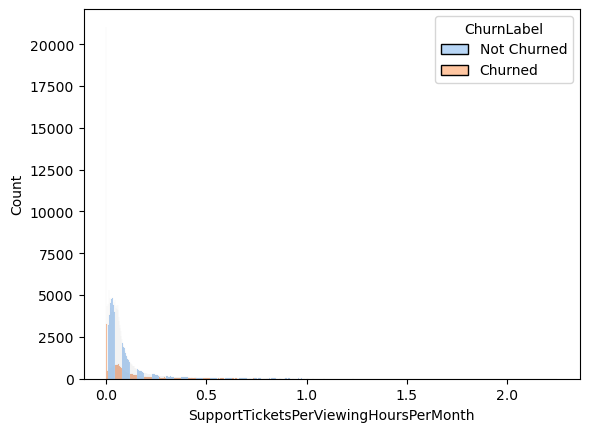

In [350]:
train_df['SupportTicketsPerViewingHoursPerMonth'] = train_df['SupportTicketsPerMonth'] / (train_df['ViewingHoursPerWeek'] * 4)
test_df['SupportTicketsPerViewingHoursPerMonth'] = test_df['SupportTicketsPerMonth'] / (test_df['ViewingHoursPerWeek'] * 4)

sns.histplot(data=train_df, x='SupportTicketsPerViewingHoursPerMonth', hue='ChurnLabel', hue_order=['Not Churned', 'Churned'], legend=True, multiple = 'dodge', palette='pastel')
plt.show()

**TotalChargesSupportTicketsPerMonth**

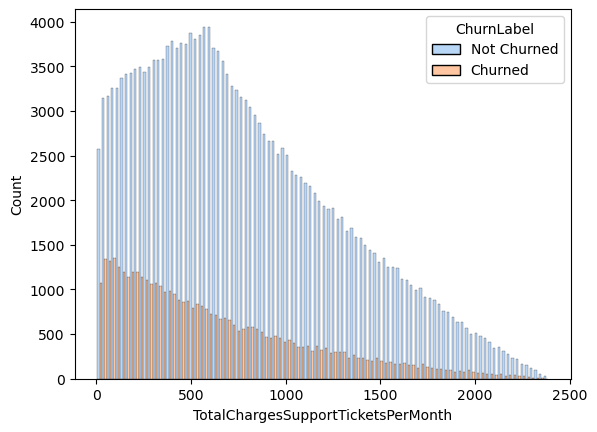

In [352]:
train_df['TotalChargesSupportTicketsPerMonth'] = train_df['TotalCharges'] + train_df['SupportTicketsPerMonth']
test_df['TotalChargesSupportTicketsPerMonth'] = test_df['TotalCharges'] + test_df['SupportTicketsPerMonth']

sns.histplot(data=train_df, x='TotalChargesSupportTicketsPerMonth', hue='ChurnLabel', hue_order=['Not Churned', 'Churned'], legend=True, multiple = 'dodge', palette='pastel')
plt.show()

**AvgContentDownloadsPerAccount** (dropped)

In [354]:
# Create new feature 'AvgContentDownloadsPerAccount'
#train_df['AvgContentDownloadsPerAccount'] = train_df['AccountAge'] / train_df['ContentDownloadsPerMonth'] 
#test_df['AvgContentDownloadsPerAccount'] = test_df['AccountAge'] / test_df['ContentDownloadsPerMonth']

# Craeate a histplot to examine the impact of 'AvgContentDownloadsPerAccount' on the user churn
#sns.histplot(data=train_df, x='AvgContentDownloadsPerAccount', hue='ChurnLabel', hue_order=['Not Churned', 'Churned'], legend=True, multiple = 'dodge', palette='pastel')
#plt.show()

In [355]:
# Apply log trasformation on 'AvgContentDownloadsPerAccount'
#train_df['AvgContentDownloadsPerAccountLog'] = np.log1p(train_df['AvgContentDownloadsPerAccount'])
#test_df['AvgContentDownloadsPerAccountLog'] = np.log1p(test_df['AvgContentDownloadsPerAccount'])

# Drop the original feature 'AvgContentDownloadsPerAccount' to avoid redundancy
#train_df = train_df.drop(columns=['AvgContentDownloadsPerAccount'])
#test_df = test_df.drop(columns=['AvgContentDownloadsPerAccount'])

# Plot histplot on the log feature
#sns.histplot(data=train_df, x='AvgContentDownloadsPerAccountLog', hue='ChurnLabel', hue_order=['Not Churned', 'Churned'], legend=True, multiple = 'dodge', palette='pastel')
#plt.show()

In [356]:
# Check if there are NaN and inf values in both datasets.
#print(train_df['AvgContentDownloadsPerAccountLog'].describe())
#print()
#print(test_df['AvgContentDownloadsPerAccountLog'].describe())

In [357]:
#print("Count of NaN values in the training set:", np.isnan(train_df['AvgContentDownloadsPerAccountLog']).sum())  # Count NaN values
#print("Count of inf values in the training set:", np.isinf(train_df['AvgContentDownloadsPerAccountLog']).sum())  # Count inf values

#print("Count of NaN values in the test set:", np.isnan(test_df['AvgContentDownloadsPerAccountLog']).sum())  # Count NaN values
#print("Count of inf values in the test set:", np.isinf(test_df['AvgContentDownloadsPerAccountLog']).sum())  # Count inf values

# 1. Convert NaN values to zero
#train_df.loc[train_df['AvgContentDownloadsPerAccountLog'] == np.nan, 'AvgContentDownloadsPerAccountLog'] = 0
#test_df.loc[test_df['AvgContentDownloadsPerAccountLog'] == np.nan, 'AvgContentDownloadsPerAccountLog'] = 0

# 2. Convert inf values to zero
#train_df.loc[train_df['AvgContentDownloadsPerAccountLog']==np.inf, 'AvgContentDownloadsPerAccountLog'] = 0
#test_df.loc[test_df['AvgContentDownloadsPerAccountLog']==np.inf, 'AvgContentDownloadsPerAccountLog'] = 0

#print(train_df['AvgContentDownloadsPerAccountLog'].describe())
#print()
#print(test_df['AvgContentDownloadsPerAccountLog'].describe())

**LoyalUser** (dropped)

In [359]:
# Let's create new feature 'LoyalUser' for users with 'AccountAge' of 80+ months.
#train_df['LoyalUser'] = np.where((train_df['AccountAge'] >= 80), 1, 0)
#test_df['LoyalUser'] = np.where((test_df['AccountAge'] >= 80), 1, 0)

# Let's check the distribution of 'LoyalUser' among not-churned and churned users.
#train_df.groupby(by=['Churn'])['LoyalUser'].value_counts(normalize=True)*100

The churn among loyal users are far bigger (68%) compared with the churn among non-loyal users (31%).
Therefore, this new feature brings predictive power to the user churn.

**PowerUser** (dropped)

In [362]:
# Let's create new feature 'PowerlUser' for users with 'AccountAge' of 80+ months and 'TotalCharges' of 1000+.
#train_df['PowerUser'] = np.where((train_df['AccountAge'] >= 24) & (train_df['TotalCharges'] >= 1150), 1, 0)
#test_df['PowerUser'] = np.where((test_df['AccountAge'] >= 24) & (test_df['TotalCharges'] >= 1150), 1, 0)

# Let's check the distribution of 'LoyalUser' among not-churned and churned users.
#train_df.groupby(by=['Churn'])['PowerUser'].value_counts(normalize=True)*100

#The churn among power users is far smaller (16%) compared with the churn among non-loyal users (84%). Therefore, this new feature brings predictive power to the user churn.

**AvgSupportTicketsPerAge** (dropped)

In [365]:
# Let's create new feature 'AvgSupportTicketsPerAge'
#train_df['AvgSupportTicketsPerAge'] = train_df['AccountAge'] * train_df['SupportTicketsPerMonth']
#test_df['AvgSupportTicketsPerAge'] = test_df['AccountAge'] * test_df['SupportTicketsPerMonth']

#sns.histplot(data=train_df, x='AvgSupportTicketsPerAge', hue='ChurnLabel', hue_order=['Not Churned', 'Churned'], legend=True, multiple = 'dodge', palette='pastel')
#plt.show()


The user churn drops with increasing the average support tickets.

**Rating_MonthlyCharges**

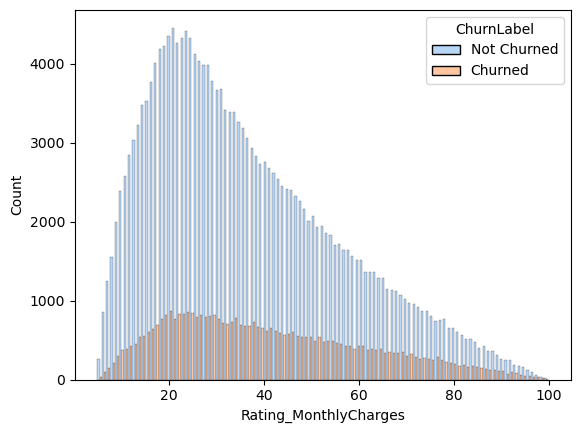

In [368]:
# Let's create new feature 'Rating_MonthlyCharges'
train_df['Rating_MonthlyCharges'] = train_df['UserRating'] * train_df['MonthlyCharges']
test_df['Rating_MonthlyCharges'] = test_df['UserRating'] * test_df['MonthlyCharges']

sns.histplot(data=train_df, x='Rating_MonthlyCharges', hue='ChurnLabel', hue_order=['Not Churned', 'Churned'], legend=True, multiple = 'dodge', palette='pastel')
plt.show()

**Rating_TotalCharges**

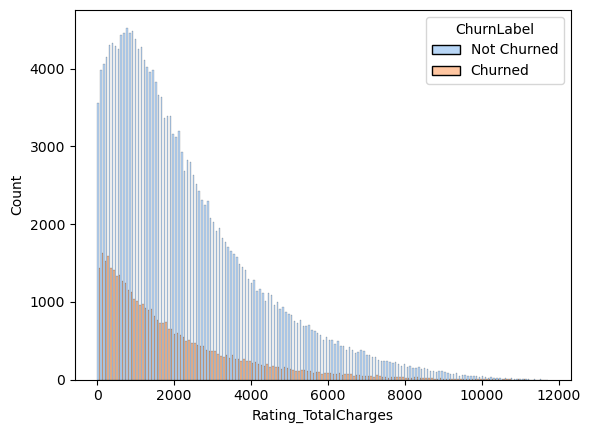

In [370]:
# Let's create new feature 'Rating_TotalCharges'
train_df['Rating_TotalCharges'] = train_df['UserRating'] * train_df['TotalCharges']
test_df['Rating_TotalCharges'] = test_df['UserRating'] * test_df['TotalCharges']

sns.histplot(data=train_df, x='Rating_TotalCharges', hue='ChurnLabel', hue_order=['Not Churned', 'Churned'], legend=True, multiple = 'dodge', palette='pastel')
plt.show()

**Rating_to_MonthlyCharges**

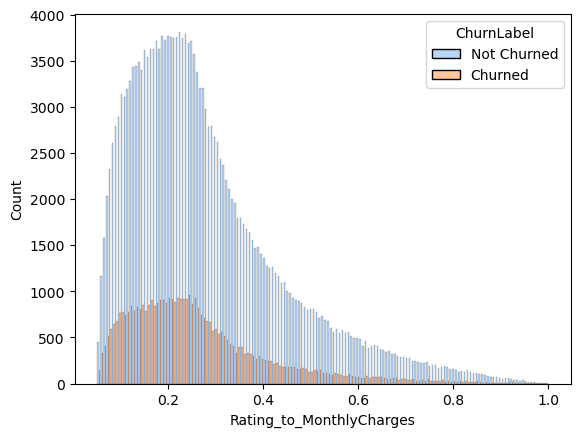

In [372]:
# Let's create new feature 'Rating_to_MonthlyCharges'
train_df['Rating_to_MonthlyCharges'] = train_df['UserRating'] / train_df['MonthlyCharges']
test_df['Rating_to_MonthlyCharges'] = test_df['UserRating'] / test_df['MonthlyCharges']

sns.histplot(data=train_df, x='Rating_to_MonthlyCharges', hue='ChurnLabel', hue_order=['Not Churned', 'Churned'], legend=True, multiple = 'dodge', palette='pastel')
plt.show()

**Rating_to_TotalCharges** (dropped)

In [374]:
# Let's create new feature 'Rating_to_TotalCharges'
#train_df['Rating_to_TotalCharges'] = train_df['UserRating'] / train_df['TotalCharges']
#test_df['Rating_to_TotalCharges'] = test_df['UserRating'] / test_df['TotalCharges']

#sns.histplot(data=train_df, x='Rating_to_TotalCharges', hue='ChurnLabel', hue_order=['Not Churned', 'Churned'], legend=True, multiple = 'dodge', palette='pastel')
#plt.show()

In [375]:
# Apply log trasformation on 'Rating_to_TotalCharges'
#train_df['Rating_to_TotalChargesLog'] = np.log1p(train_df['Rating_to_TotalCharges'])
#test_df['Rating_to_TotalChargesLog'] = np.log1p(test_df['Rating_to_TotalCharges'])

# Plot histplot on the log feature
#sns.histplot(data=train_df, x='Rating_to_TotalChargesLog', hue='ChurnLabel', hue_order=['Not Churned', 'Churned'], legend=True, multiple = 'dodge', palette='pastel')
#plt.show()

# Drop the original feature 'Rating_to_TotalCharges' to avoid redundancy
#train_df = train_df.drop(columns=['Rating_to_TotalCharges'])
#test_df = test_df.drop(columns=['Rating_to_TotalCharges'])

**Tickets_MonthlyCharges**

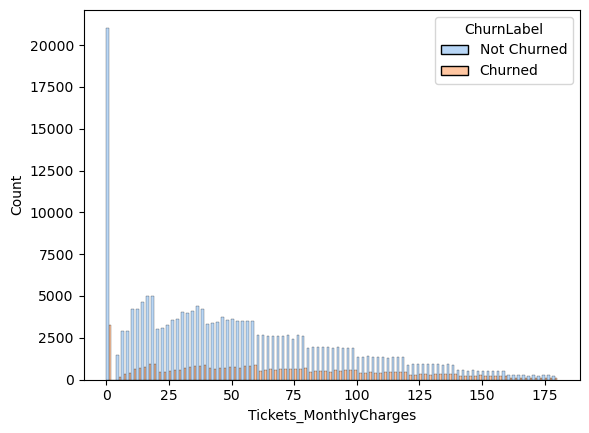

In [377]:
train_df['Tickets_MonthlyCharges'] = train_df['SupportTicketsPerMonth'] * train_df['MonthlyCharges']
test_df['Tickets_MonthlyCharges'] = test_df['SupportTicketsPerMonth'] * test_df['MonthlyCharges']

sns.histplot(data=train_df, x='Tickets_MonthlyCharges', hue='ChurnLabel', hue_order=['Not Churned', 'Churned'], legend=True, multiple = 'dodge', palette='pastel')
plt.show()

**Tickets_TotalCharges**

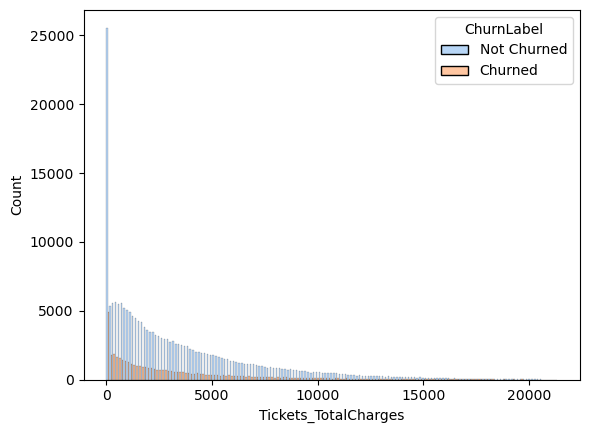

In [379]:
train_df['Tickets_TotalCharges'] = train_df['SupportTicketsPerMonth'] * train_df['TotalCharges']
test_df['Tickets_TotalCharges'] = test_df['SupportTicketsPerMonth'] * test_df['TotalCharges']

sns.histplot(data=train_df, x='Tickets_TotalCharges', hue='ChurnLabel', hue_order=['Not Churned', 'Churned'], legend=True, multiple = 'dodge', palette='pastel')
plt.show()

**Tickets_to_MonthlyCharges**

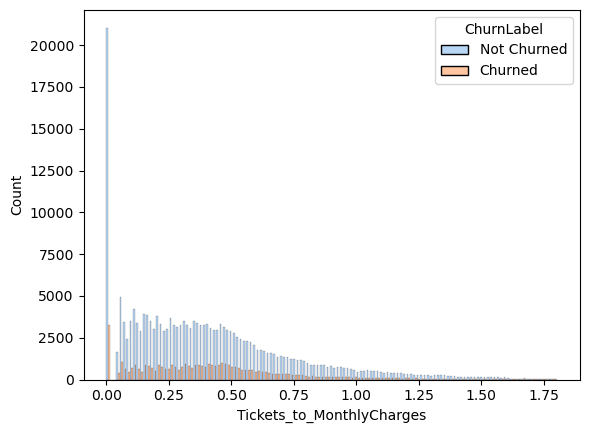

In [381]:
train_df['Tickets_to_MonthlyCharges'] = train_df['SupportTicketsPerMonth'] / train_df['MonthlyCharges']
test_df['Tickets_to_MonthlyCharges'] = test_df['SupportTicketsPerMonth'] / test_df['MonthlyCharges']

sns.histplot(data=train_df, x='Tickets_to_MonthlyCharges', hue='ChurnLabel', hue_order=['Not Churned', 'Churned'], legend=True, multiple = 'dodge', palette='pastel')
plt.show()

**Tickets_to_TotalCharges**

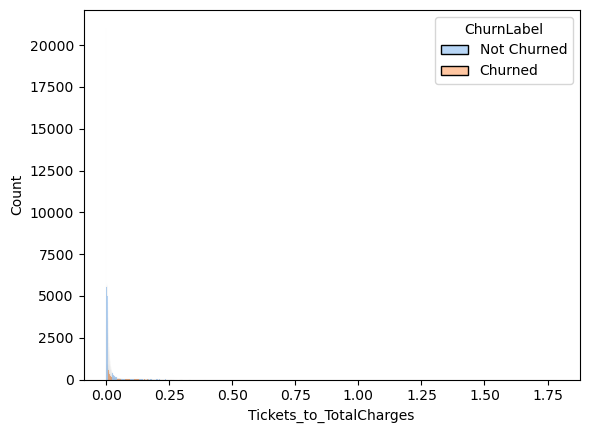

In [383]:
train_df['Tickets_to_TotalCharges'] = train_df['SupportTicketsPerMonth'] / train_df['TotalCharges']
test_df['Tickets_to_TotalCharges'] = test_df['SupportTicketsPerMonth'] / test_df['TotalCharges']

sns.histplot(data=train_df, x='Tickets_to_TotalCharges', hue='ChurnLabel', hue_order=['Not Churned', 'Churned'], legend=True, multiple = 'dodge', palette='pastel')
plt.show()

**Tickets_AccountAge**

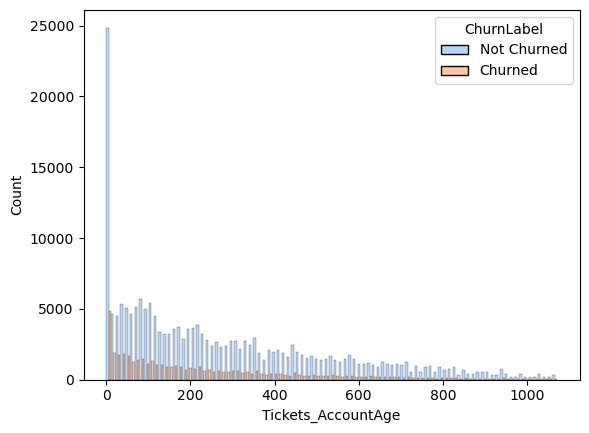

In [385]:
train_df['Tickets_AccountAge'] = train_df['SupportTicketsPerMonth'] * train_df['AccountAge']
test_df['Tickets_AccountAge'] = test_df['SupportTicketsPerMonth'] * test_df['AccountAge']

sns.histplot(data=train_df, x='Tickets_AccountAge', hue='ChurnLabel', hue_order=['Not Churned', 'Churned'], legend=True, multiple = 'dodge', palette='pastel')
plt.show()

**Tickets_to_AccountAge**

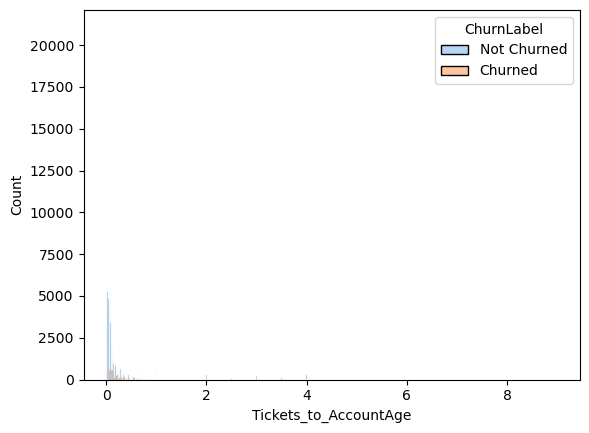

In [387]:
train_df['Tickets_to_AccountAge'] = train_df['SupportTicketsPerMonth'] / train_df['AccountAge']
test_df['Tickets_to_AccountAge'] = test_df['SupportTicketsPerMonth'] / test_df['AccountAge']

sns.histplot(data=train_df, x='Tickets_to_AccountAge', hue='ChurnLabel', hue_order=['Not Churned', 'Churned'], legend=True, multiple = 'dodge', palette='pastel')
plt.show()

**Tickets_Rating**

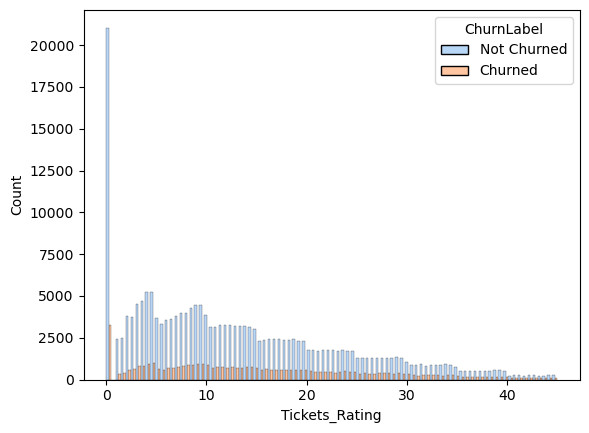

In [389]:
train_df['Tickets_Rating'] = train_df['SupportTicketsPerMonth'] * train_df['UserRating']
test_df['Tickets_Rating'] = test_df['SupportTicketsPerMonth'] * test_df['UserRating']

sns.histplot(data=train_df, x='Tickets_Rating', hue='ChurnLabel', hue_order=['Not Churned', 'Churned'], legend=True, multiple = 'dodge', palette='pastel')
plt.show()

**Tickets_to_Rating**

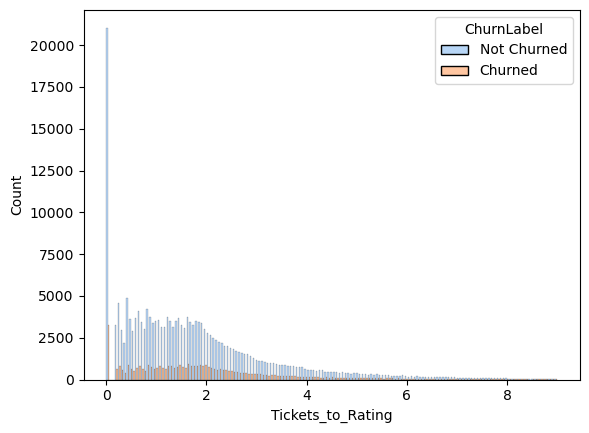

In [391]:
train_df['Tickets_to_Rating'] = train_df['SupportTicketsPerMonth'] / train_df['UserRating']
test_df['Tickets_to_Rating'] = test_df['SupportTicketsPerMonth'] / test_df['UserRating']

sns.histplot(data=train_df, x='Tickets_to_Rating', hue='ChurnLabel', hue_order=['Not Churned', 'Churned'], legend=True, multiple = 'dodge', palette='pastel')
plt.show()

**WatchlistSizeViewingHoursPerMonth**

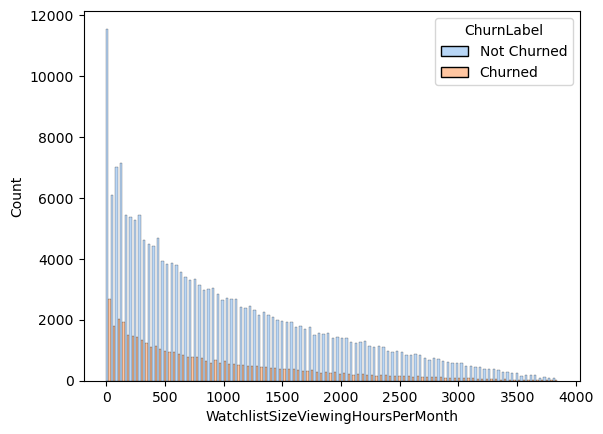

In [393]:
train_df['WatchlistSizeViewingHoursPerMonth'] = train_df['WatchlistSize'] * train_df['ViewingHoursPerWeek'] * 4
test_df['WatchlistSizeViewingHoursPerMonth'] = test_df['WatchlistSize'] * test_df['ViewingHoursPerWeek'] * 4

sns.histplot(data=train_df, x='WatchlistSizeViewingHoursPerMonth', hue='ChurnLabel', hue_order=['Not Churned', 'Churned'], legend=True, multiple = 'dodge', palette='pastel')
plt.show()

**WatchListUtilPerMonth**

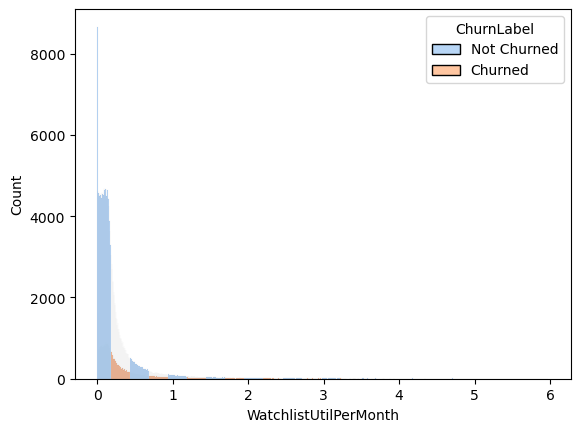

In [395]:
train_df['WatchlistUtilPerMonth'] = train_df['WatchlistSize'] / (train_df['ViewingHoursPerWeek'] * 4)
test_df['WatchlistUtilPerMonth'] = test_df['WatchlistSize'] / (test_df['ViewingHoursPerWeek'] * 4)

sns.histplot(data=train_df, x='WatchlistUtilPerMonth', hue='ChurnLabel', hue_order=['Not Churned', 'Churned'], legend=True, multiple = 'dodge', palette='pastel')
plt.show()

**WatchlistSizeContentDownloadsPerMonth**

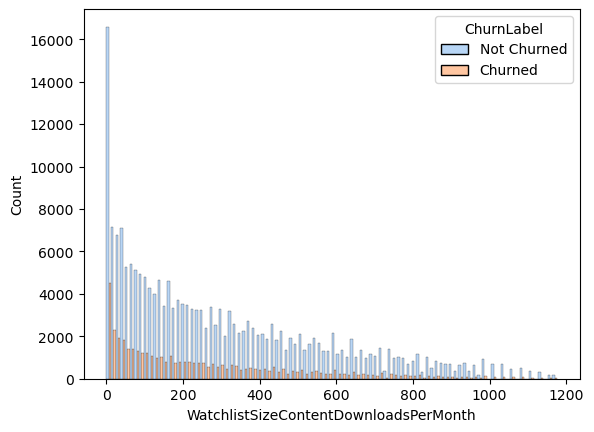

In [397]:
train_df['WatchlistSizeContentDownloadsPerMonth'] = train_df['WatchlistSize'] * (train_df['ContentDownloadsPerMonth'])
test_df['WatchlistSizeContentDownloadsPerMonth'] = test_df['WatchlistSize'] * (test_df['ContentDownloadsPerMonth'])

sns.histplot(data=train_df, x='WatchlistSizeContentDownloadsPerMonth', hue='ChurnLabel', hue_order=['Not Churned', 'Churned'], legend=True, multiple = 'dodge', palette='pastel')
plt.show()

**ChargesPerContentDownload**

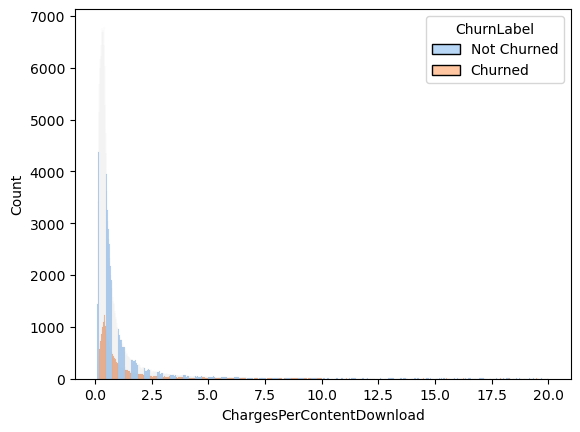

In [399]:
train_df['ChargesPerContentDownload'] = train_df['MonthlyCharges'] / (train_df['ContentDownloadsPerMonth'])
test_df['ChargesPerContentDownload'] = test_df['MonthlyCharges'] / (test_df['ContentDownloadsPerMonth'])

sns.histplot(data=train_df, x='ChargesPerContentDownload', hue='ChurnLabel', hue_order=['Not Churned', 'Churned'], legend=True, multiple = 'dodge', palette='pastel')
plt.show()

In [400]:
train_df['ChargesPerContentDownload'].describe()

count    2.437870e+05
mean              inf
std               NaN
min      1.018457e-01
25%      3.236241e-01
50%      5.092098e-01
75%      1.039502e+00
max               inf
Name: ChargesPerContentDownload, dtype: float64

In [401]:
print("Count of NaN values in the training set:", np.isnan(train_df['ChargesPerContentDownload']).sum())  # Count NaN values
print("Count of inf values in the training set:", np.isinf(train_df['ChargesPerContentDownload']).sum())  # Count inf values

print("Count of NaN values in the test set:", np.isnan(test_df['ChargesPerContentDownload']).sum())  # Count NaN values
print("Count of inf values in the test set:", np.isinf(test_df['ChargesPerContentDownload']).sum())  # Count inf values

Count of NaN values in the training set: 0
Count of inf values in the training set: 4851
Count of NaN values in the test set: 0
Count of inf values in the test set: 2131


In [402]:
# Convert inf values to zero
train_df.loc[train_df['ChargesPerContentDownload']==np.inf, 'ChargesPerContentDownload'] = 0
test_df.loc[test_df['ChargesPerContentDownload']==np.inf, 'ChargesPerContentDownload'] = 0

print(train_df['ChargesPerContentDownload'].describe())
print()
print(test_df['ChargesPerContentDownload'].describe())

count    243787.000000
mean          1.113209
std           2.080079
min           0.000000
25%           0.309960
50%           0.489326
75%           0.959395
max          19.989755
Name: ChargesPerContentDownload, dtype: float64

count    104480.000000
mean          1.127131
std           2.124862
min           0.000000
25%           0.308515
50%           0.489481
75%           0.967278
max          19.986608
Name: ChargesPerContentDownload, dtype: float64


****

### **Examine the relationship between other features and user churn**

In [405]:
# Let's examine the impact of 'AverageViewingDuration' of the three different 'SubscriptionType' categories on the user churn.
train_df.groupby(by=['SubscriptionTypeEncoded', 'Churn'])['AverageViewingDuration'].mean()


SubscriptionTypeEncoded  Churn
0.0                      0        95.967534
                         1        76.794683
1.0                      0        95.728316
                         1        76.848926
2.0                      0        95.575420
                         1        75.725380
Name: AverageViewingDuration, dtype: float64

In [406]:
# Let's examine the average total charges per subscription types on not-churned and churned users.
print(train_df['SubscriptionTypeEncoded'].value_counts())
train_df.groupby(by=['SubscriptionTypeEncoded', 'Churn'])['TotalCharges'].mean()

SubscriptionTypeEncoded
1.0    81920
0.0    81050
2.0    80817
Name: count, dtype: int64


SubscriptionTypeEncoded  Churn
0.0                      0        786.120430
                         1        620.615313
1.0                      0        778.134322
                         1        620.384496
2.0                      0        777.138452
                         1        607.857392
Name: TotalCharges, dtype: float64

The average total charges among all the three types of users who churned don't vary much - from 607 for 'Premium' users, to 620 for 'Basic' users.
Therefore, it can't bring predictive power to the user churn.

In [408]:
# Let's examine the average monthly charges per subscription types on not-churned and churned users.
train_df.groupby(by=['SubscriptionTypeEncoded', 'Churn'])['MonthlyCharges'].mean()

SubscriptionTypeEncoded  Churn
0.0                      0        12.279292
                         1        13.387877
1.0                      0        12.277783
                         1        13.446645
2.0                      0        12.300950
                         1        13.411116
Name: MonthlyCharges, dtype: float64

Also the average monthly charges among all the three types of users who churned don't vary much - from 13.38 for 'Basic' users, to 13.44 for 'Standard' users.
Therefore, it can't bring predictive power to the user churn.

In [410]:
# Let's examine the payment method of not-churned and churned users.
print(train_df.groupby(by=['Churn'])['PaymentMethod'].value_counts(normalize=True)*100)

Churn  PaymentMethod  
0      CreditCard         25.570001
       BankTransfer       24.998372
       ElectronicCheck    24.804990
       MailedCheck        24.626638
1      ElectronicCheck    26.709972
       MailedCheck        26.248246
       BankTransfer       24.668417
       CreditCard         22.373365
Name: proportion, dtype: float64


The users who use electronic and mailed checks churn slightly more than users who use other three payment methods.
Users who use credit cards churn the least, so the video company should stimulate users to pay with credit cards by giving them some benefits and promotions.

In [412]:
# Let's examine if the paperless billing is bigger among churned users or not.
print(train_df.groupby(by=['Churn'])['PaperlessBilling'].value_counts(normalize=True)*100)

Churn  PaperlessBilling
0      No                  50.013777
       Yes                 49.986223
1      No                  50.133539
       Yes                 49.866461
Name: proportion, dtype: float64


Paper or paperless billing, there is a very small difference between the number of churned vs. the number of retained users.

In [414]:
# Examine if the 'ContentType' is predicting user churn
print(train_df.groupby(by=['Churn'])['ContentType'].value_counts(normalize=True)*100)

Churn  ContentType
0      TVShows        33.441046
       Movies         33.327321
       Both           33.231632
1      Both           34.867140
       TVShows        32.581142
       Movies         32.551718
Name: proportion, dtype: float64


The user churn is bigger for both movies an TV shows (2.3%), comparing to users who prefer movies and TV shows individually who churn less.

In [416]:
# Examine if the 'MultiDeviceAccess' is predicting user churn
print(train_df.groupby(by=['Churn'])['MultiDeviceAccess'].value_counts(normalize=True) * 100)

Churn  MultiDeviceAccess
0      No                   50.027805
       Yes                  49.972195
1      No                   50.194649
       Yes                  49.805351
Name: proportion, dtype: float64


The user churn is almost the same among single and multi device users, with single device users having very slightly bigger churn (0.4%).

In [418]:
# Examine if the 'DeviceRegistered' is predicting user churn
print(train_df.groupby(by=['Churn'])['DeviceRegistered'].value_counts(normalize=True) * 100)

Churn  DeviceRegistered
0      Computer            25.078530
       Tablet              25.052479
       Mobile              24.951780
       TV                  24.917211
1      Tablet              25.207098
       Mobile              25.143724
       Computer            25.098456
       TV                  24.550722
Name: proportion, dtype: float64


The user churn is almost the same among all users with different device registered. Only TV users have slightly smaller churn than others.
Maybe the video company should consider publishing more videos better suited for computers, mobiles and tablets.

In [420]:
train_df['GenrePreference'].value_counts(normalize=True)

GenrePreference
Comedy     0.201241
Fantasy    0.200811
Drama      0.199945
Action     0.199724
Sci-Fi     0.198280
Name: proportion, dtype: float64

In [421]:
# Examine if the 'GenrePreference' is predicting user churn
print(train_df.groupby(by=['Churn'])['GenrePreference'].value_counts(normalize=True) * 100)

Churn  GenrePreference
0      Action             20.347186
       Fantasy            20.191378
       Drama              20.056111
       Comedy             19.824654
       Sci-Fi             19.580672
1      Comedy             21.477072
       Sci-Fi             20.945181
       Drama              19.716174
       Fantasy            19.582635
       Action             18.278937
Name: proportion, dtype: float64


The users who prefer Comedy and Sci-Fi churn slightly more than other users.
The company should include more videos from these genres to retain more users on the platform. Also, the company should increase the number of videos from 'Action', 'Fantasy' and 'Drama' genres , because those genres are preferred by the retained users.

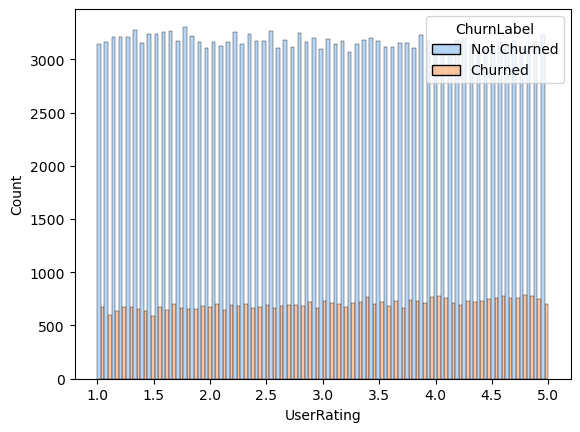

In [423]:
# Examine if the 'UserRating' is predicting user churn
sns.histplot(data=train_df, x='UserRating', hue='ChurnLabel', hue_order=['Not Churned', 'Churned'], legend=True, multiple = 'dodge', palette='pastel')
plt.show()


The user churn is almost the same among all users with different ratings for the service.

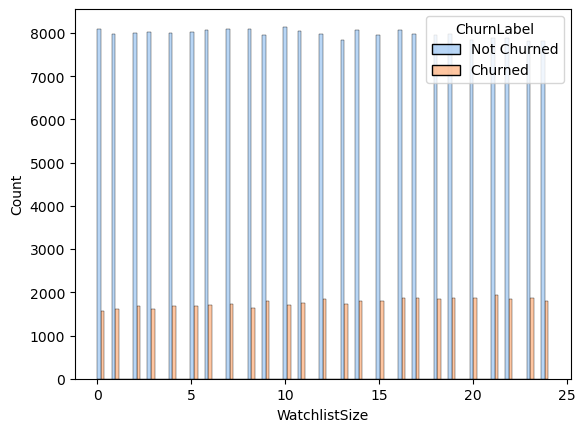

In [425]:
# Examine if the 'WatchlistSize' is predicting user churn
sns.histplot(data=train_df, x='WatchlistSize', hue='ChurnLabel', hue_order=['Not Churned', 'Churned'], legend=True, multiple = 'dodge', palette='pastel')
plt.show()

The user churn is almost the same among all different watchlist sizes.

WatchlistSize  Churn
0              0        8098
               1        1556
1              0        7981
               1        1619
2              0        8000
               1        1691
3              0        8028
               1        1624
4              0        8007
               1        1691
5              0        8024
               1        1681
6              0        8061
               1        1708
7              0        8098
               1        1727
8              0        8098
               1        1647
9              0        7949
               1        1790
10             0        8147
               1        1715
11             0        8042
               1        1751
12             0        7970
               1        1850
13             0        7849
               1        1736
14             0        8074
               1        1808
15             0        7959
               1        1800
16             0        8071
               1      

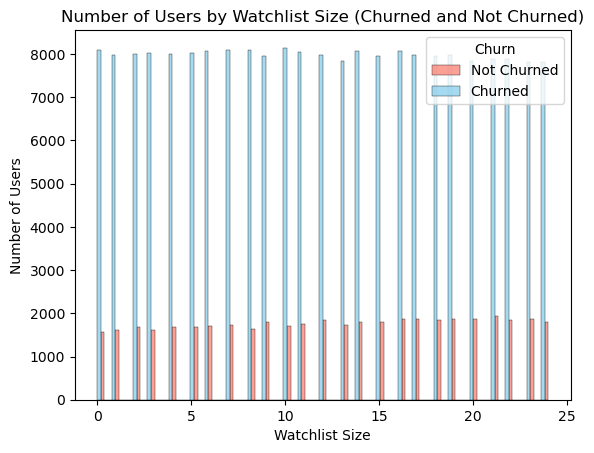

In [39]:
print(train_df.groupby(by='WatchlistSize')['Churn'].value_counts())
sns.histplot(data=train_df, x='WatchlistSize', hue='Churn', multiple='dodge', palette=['skyblue', 'salmon'])

# Set plot labels and title
plt.xlabel('Watchlist Size')
plt.ylabel('Number of Users')
plt.title('Number of Users by Watchlist Size (Churned and Not Churned)')
plt.legend(title='Churn', labels=['Not Churned', 'Churned'])
plt.show()


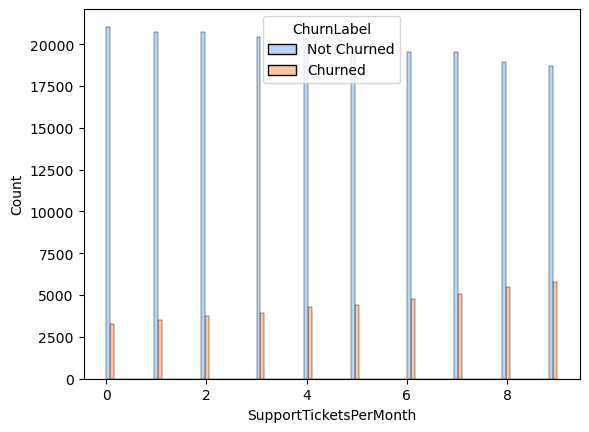

In [427]:
# Examine if the 'SupportTicketsPerMonth' is predicting user churn
sns.histplot(data=train_df, x='SupportTicketsPerMonth', hue='ChurnLabel', hue_order=['Not Churned', 'Churned'], legend=True, multiple = 'dodge', palette='pastel')
plt.show()

The number of support tickets per month is positively correlated with the user churn.

In [429]:
# Examine if the user churn is different among different genders
print(train_df.groupby(by=['Churn'])['Gender'].value_counts(normalize=True) * 100)

Churn  Gender
0      Female    50.190626
       Male      49.809374
1      Male      50.778598
       Female    49.221402
Name: proportion, dtype: float64


There is a small difference in user churn among females and males (male users churn only 1.5% more than female users).

In [431]:
# Examine if the using the parental control has impact on the user churn
print(train_df.groupby(by=['Churn'])['ParentalControl'].value_counts(normalize=True) * 100)

Churn  ParentalControl
0      Yes                50.208662
       No                 49.791338
1      No                 50.509257
       Yes                49.490743
Name: proportion, dtype: float64


There is a small difference in user churn among users who use parental control and those who don't use (only 1% more among users who don't use parental control).

In [433]:
# Examine if the using the subtitles has impact on the user churn
print(train_df.groupby(by=['Churn'])['SubtitlesEnabled'].value_counts(normalize=True) * 100)

Churn  SubtitlesEnabled
0      Yes                 50.408557
       No                  49.591443
1      No                  51.197320
       Yes                 48.802680
Name: proportion, dtype: float64


The users who use subtitles churn only 2.4% more than the users who don't use subtitles. 

In [435]:
# Let's check 'train_df' and 'test_df'
print(train_df.info())
print()
print(test_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243787 entries, 0 to 243786
Data columns (total 44 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   AccountAge                                  243787 non-null  int64  
 1   MonthlyCharges                              243787 non-null  float64
 2   TotalCharges                                243787 non-null  float64
 3   PaymentMethod                               243787 non-null  object 
 4   PaperlessBilling                            243787 non-null  object 
 5   ContentType                                 243787 non-null  object 
 6   MultiDeviceAccess                           243787 non-null  object 
 7   DeviceRegistered                            243787 non-null  object 
 8   ViewingHoursPerWeek                         243787 non-null  float64
 9   AverageViewingDuration                      243787 non-null  float64
 

**Correlation among features**

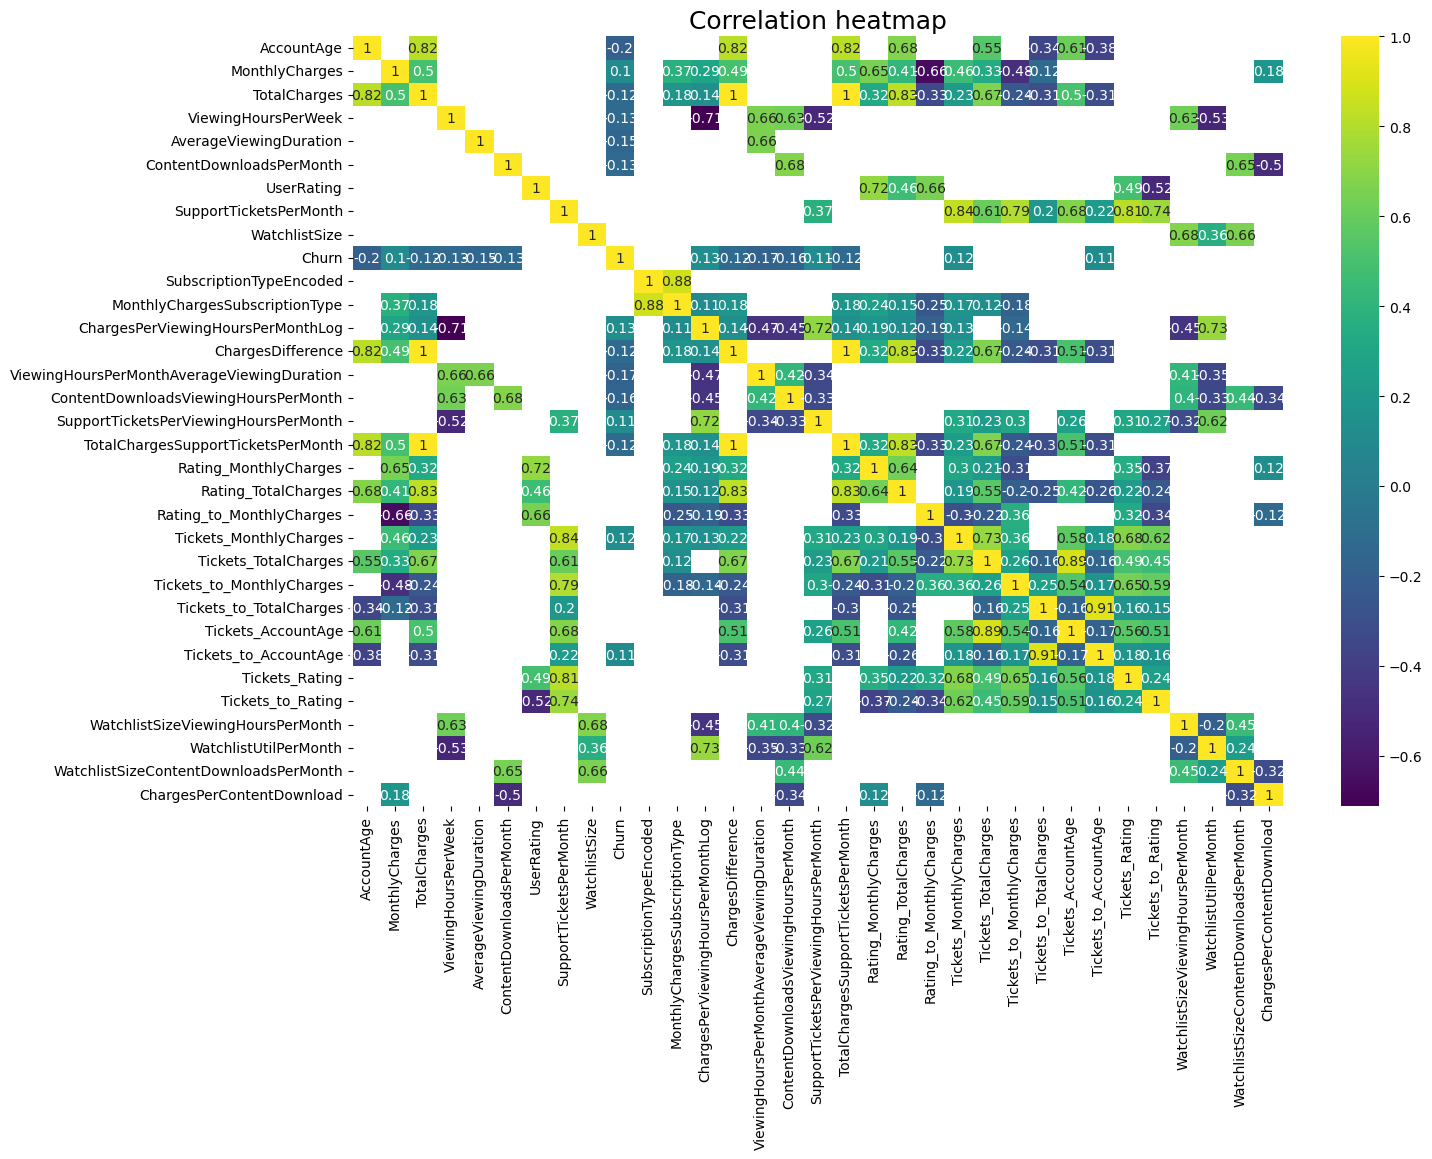

In [437]:
# Show the correlations between potential features
corr_matrix = train_df.corr(method='pearson', numeric_only=True)
filtered_corr_matrix = corr_matrix[abs(corr_matrix) > 0.1]

plt.figure(figsize=(15,10))
sns.heatmap(filtered_corr_matrix, annot=True, cmap='viridis')
plt.title('Correlation heatmap', fontsize=18)
plt.show();

In [438]:
# Drop redundant variables after engineering new ones
# Also drop the variables with no predictive power or redundancy
train_df = train_df.drop(columns=['ChurnLabel'])

#print(train_df.info())
#print()
#print(test_df.info())

### **Encoding categorical variables**

The tree-based models are predicting on numerical values, so the following 9 categorical variables should be converted to numerical by encodind them:
'PaymentMethod', 'PaperlessBilling', 'ContentType', 'MultiDeviceAccess', 'DeviceRegistered', 'GenrePreference', 'Gender', 'ParentalControl', and 'SubtitlesEnabled'.  
The 'Churn' variable is the outcome variable, and it is already encoded with values 0 - no churn, and 1 - churn.

In [441]:
# Preserve the original 'train_df' and 'test_df'
train_df_encoded = train_df.copy()
test_df_encoded = test_df.copy()


In [442]:
# Encode the categorical variables in 'train' set 

train_df_encoded = pd.get_dummies(train_df_encoded, columns=['PaymentMethod', 'PaperlessBilling',
                                                             'ContentType', 'MultiDeviceAccess', 'DeviceRegistered',
                                                             'GenrePreference', 'Gender', 'ParentalControl',
                                                             'SubtitlesEnabled'], drop_first=True)

train_df_encoded = train_df_encoded.replace({True: 1, False: 0})

# Exclude 'CustomerID' from changing dtypes
numeric_cols = train_df_encoded.select_dtypes(include=['object']).columns.difference(['CustomerID'])

# Change dtypes to int32
train_df_encoded[numeric_cols] = train_df_encoded[numeric_cols].astype(np.int32)

train_df_encoded.head()


,AccountAge,MonthlyCharges,TotalCharges,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,UserRating,SupportTicketsPerMonth,WatchlistSize,CustomerID,...,DeviceRegistered_Mobile,DeviceRegistered_TV,DeviceRegistered_Tablet,GenrePreference_Comedy,GenrePreference_Drama,GenrePreference_Fantasy,GenrePreference_Sci-Fi,Gender_Male,ParentalControl_Yes,SubtitlesEnabled_Yes
0,20,11.055215,221.104302,36.758104,63.531377,10,2.176498,4,3,CB6SXPNVZA,...,1,0,0,0,0,0,1,1,0,0
1,57,5.175208,294.986882,32.450568,25.725595,18,3.478632,8,23,S7R2G87O09,...,0,0,1,0,0,0,0,1,0,1
2,73,12.106657,883.785952,7.395160,57.364061,23,4.238824,6,1,EASDC20BDT,...,0,0,0,0,0,1,0,1,1,1
3,32,7.263743,232.439774,27.960389,131.537507,30,4.276013,2,24,NPF69NT69N,...,0,0,1,0,1,0,0,1,1,1
4,57,16.953078,966.325422,20.083397,45.356653,20,3.616170,4,0,4LGYPK7VOL,...,0,1,0,1,0,0,0,0,0,0


In [443]:
train_df_encoded.describe()

,AccountAge,MonthlyCharges,TotalCharges,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,UserRating,SupportTicketsPerMonth,WatchlistSize,Churn,...,DeviceRegistered_Mobile,DeviceRegistered_TV,DeviceRegistered_Tablet,GenrePreference_Comedy,GenrePreference_Drama,GenrePreference_Fantasy,GenrePreference_Sci-Fi,Gender_Male,ParentalControl_Yes,SubtitlesEnabled_Yes
count,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000,...,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000
mean,60.083758,12.490695,750.741017,20.502179,92.264061,24.503513,3.002713,4.504186,12.018508,0.181232,...,0.249866,0.248508,0.250805,0.201241,0.199945,0.200811,0.198280,0.499850,0.500786,0.501175
std,34.285143,4.327615,523.073273,11.243753,50.505243,14.421174,1.155259,2.872548,7.193034,0.385211,...,0.432936,0.432149,0.433477,0.400929,0.399960,0.400607,0.398705,0.500001,0.500000,0.500000
min,1.000000,4.990062,4.991154,1.000065,5.000547,0.000000,1.000007,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,8.738543,329.147027,10.763953,48.382395,12.000000,2.000853,2.000000,6.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,60.000000,12.495555,649.878487,20.523116,92.249992,24.000000,3.002261,4.000000,12.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
75%,90.000000,16.238160,1089.317362,30.219396,135.908048,37.000000,4.002157,7.000000,18.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,119.000000,19.989957,2378.723844,39.999723,179.999275,49.000000,4.999989,9.000000,24.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [444]:
# Check the new dtypes
train_df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243787 entries, 0 to 243786
Data columns (total 51 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   AccountAge                                  243787 non-null  int64  
 1   MonthlyCharges                              243787 non-null  float64
 2   TotalCharges                                243787 non-null  float64
 3   ViewingHoursPerWeek                         243787 non-null  float64
 4   AverageViewingDuration                      243787 non-null  float64
 5   ContentDownloadsPerMonth                    243787 non-null  int64  
 6   UserRating                                  243787 non-null  float64
 7   SupportTicketsPerMonth                      243787 non-null  int64  
 8   WatchlistSize                               243787 non-null  int64  
 9   CustomerID                                  243787 non-null  object 
 

In [446]:
# Encode the categorical variables in 'test' set 

test_df_encoded = pd.get_dummies(test_df_encoded, columns=['PaymentMethod', 'PaperlessBilling',
                                                           'ContentType', 'MultiDeviceAccess', 'DeviceRegistered',
                                                           'GenrePreference', 'Gender', 'ParentalControl',
                                                           'SubtitlesEnabled'], drop_first=True)
test_df_encoded = test_df_encoded.replace({True: 1, False: 0})

# Exclude 'CustomerID' from changing dtypes
numeric_cols = test_df_encoded.select_dtypes(include=['object']).columns.difference(['CustomerID'])

# Change dtypes to int32
test_df_encoded[numeric_cols] = test_df_encoded[numeric_cols].astype(np.int32)

test_df_encoded.head()

,AccountAge,MonthlyCharges,TotalCharges,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,UserRating,SupportTicketsPerMonth,WatchlistSize,CustomerID,...,DeviceRegistered_Mobile,DeviceRegistered_TV,DeviceRegistered_Tablet,GenrePreference_Comedy,GenrePreference_Drama,GenrePreference_Fantasy,GenrePreference_Sci-Fi,Gender_Male,ParentalControl_Yes,SubtitlesEnabled_Yes
0,38,17.869374,679.036195,29.126308,122.274031,42,3.522724,2,23,O1W6BHP6RM,...,0,1,0,1,0,0,0,1,0,0
1,77,9.912854,763.289768,36.873729,57.093319,43,2.021545,2,22,LFR4X92X8H,...,0,1,0,0,0,0,0,0,1,0
2,5,15.019011,75.095057,7.601729,140.414001,14,4.806126,2,22,QM5GBIYODA,...,0,0,0,0,0,0,1,0,0,1
3,88,15.357406,1351.451692,35.586430,177.002419,14,4.943900,0,23,D9RXTK2K9F,...,0,0,1,1,0,0,0,0,1,1
4,91,12.406033,1128.949004,23.503651,70.308376,6,2.846880,6,0,ENTCCHR1LR,...,0,0,1,0,1,0,0,0,0,0


In [447]:
# Check the new dtypes
print(train_df_encoded.info())
print(test_df_encoded.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243787 entries, 0 to 243786
Data columns (total 51 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   AccountAge                                  243787 non-null  int64  
 1   MonthlyCharges                              243787 non-null  float64
 2   TotalCharges                                243787 non-null  float64
 3   ViewingHoursPerWeek                         243787 non-null  float64
 4   AverageViewingDuration                      243787 non-null  float64
 5   ContentDownloadsPerMonth                    243787 non-null  int64  
 6   UserRating                                  243787 non-null  float64
 7   SupportTicketsPerMonth                      243787 non-null  int64  
 8   WatchlistSize                               243787 non-null  int64  
 9   CustomerID                                  243787 non-null  object 
 

In [448]:
# Check the class balance of the outcome variable 
print(train_df_encoded['Churn'].value_counts(normalize=True))


Churn
0    0.818768
1    0.181232
Name: proportion, dtype: float64


The 'churn' class is imbalanced among the training set - 81.9% not churned, and 18.1% churned users. It is prefered to balance it before modeling.

**Correlation among potential predictor variables**

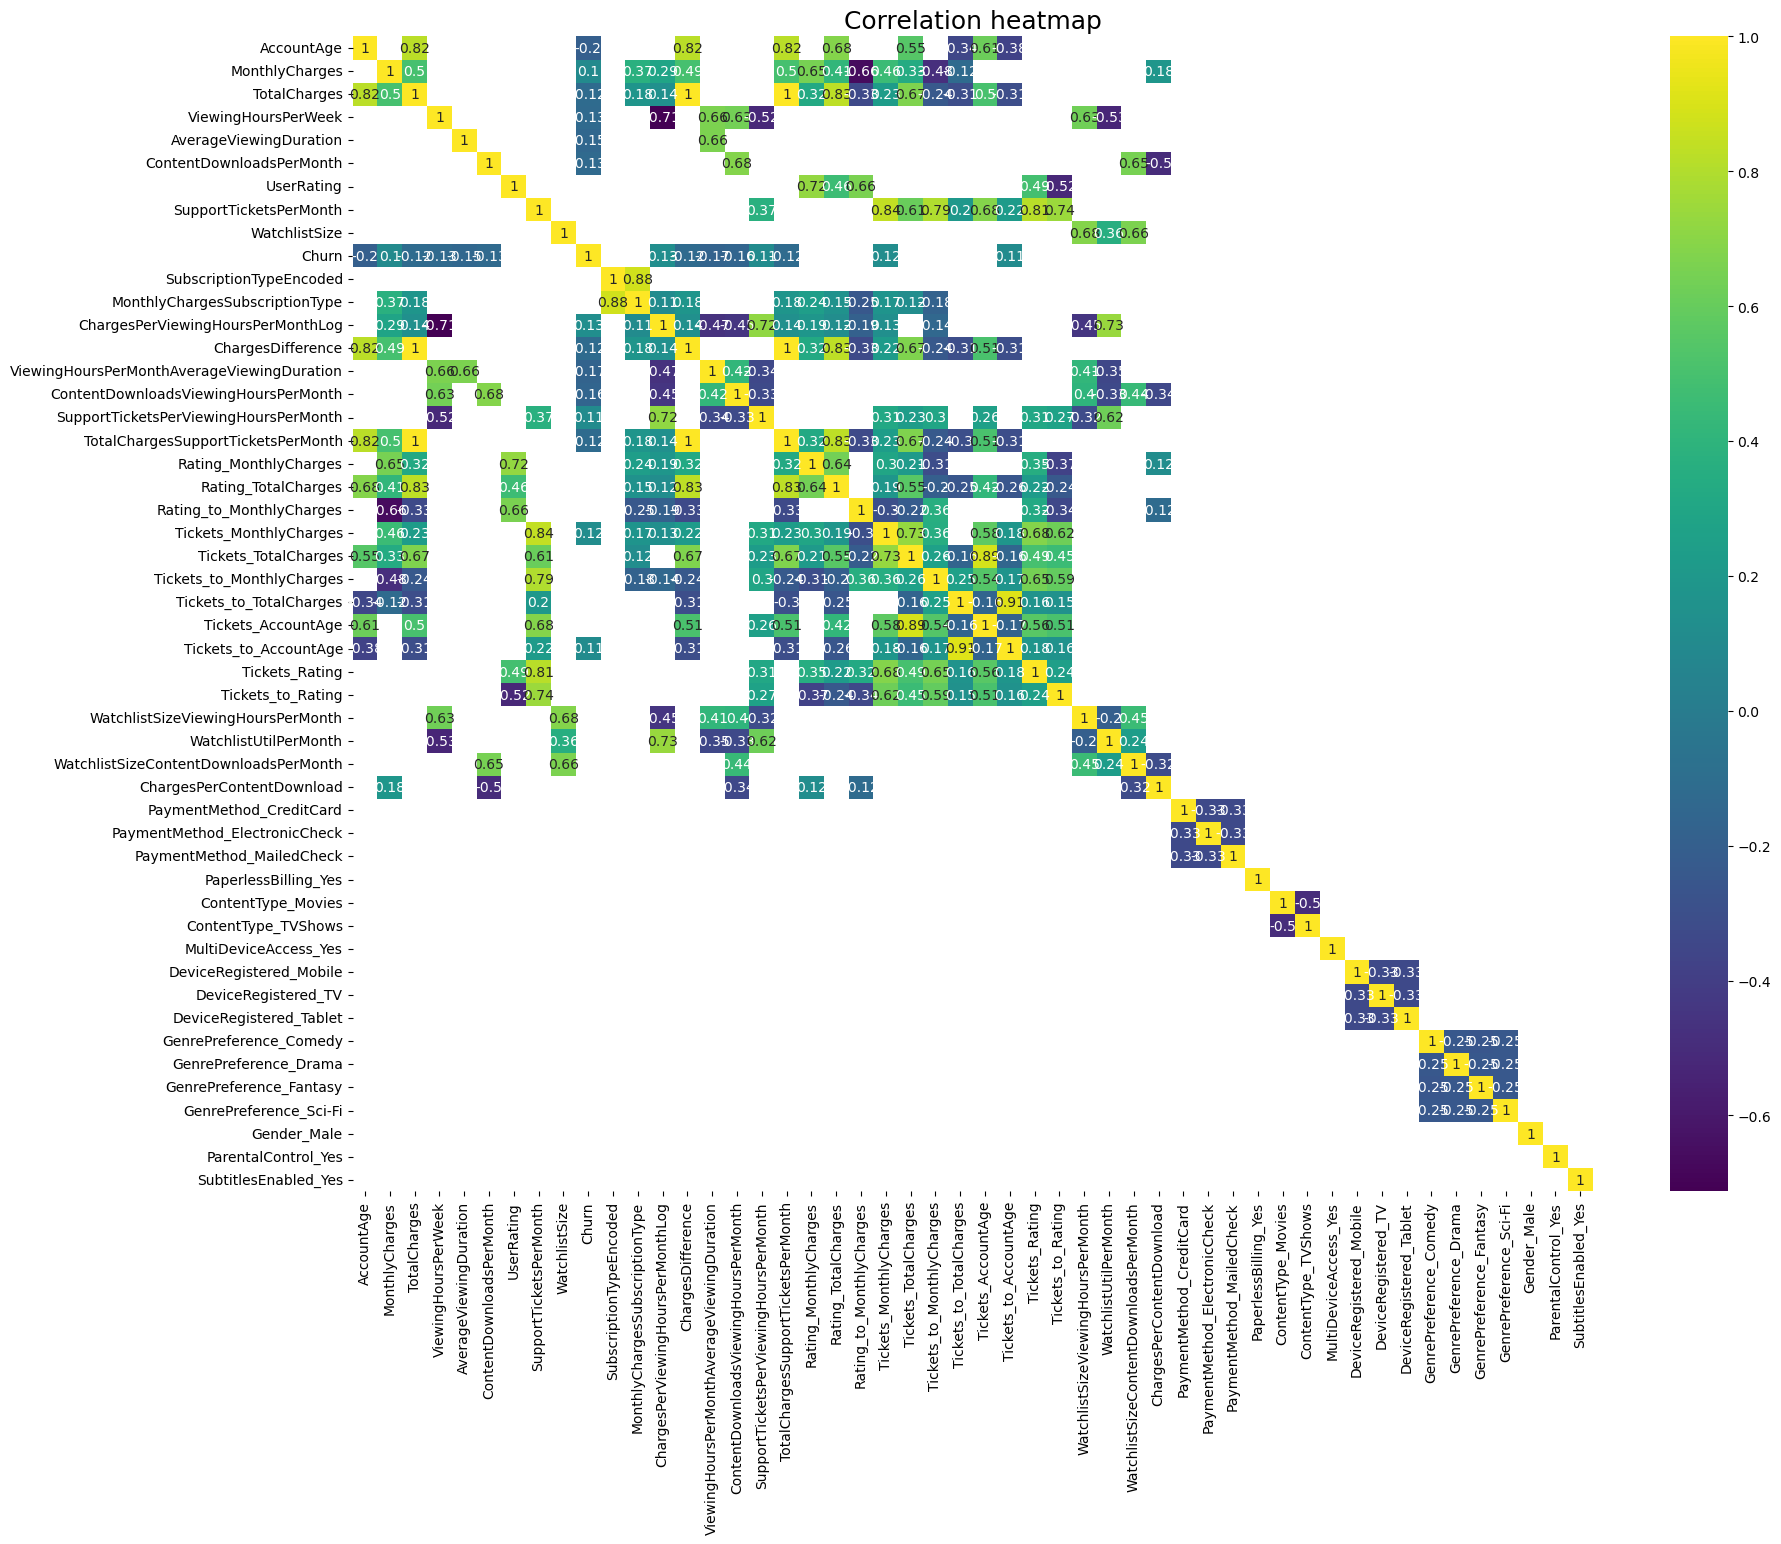

In [451]:
corr_matrix = train_df_encoded.corr(method='pearson', numeric_only=True)
filtered_corr_matrix = corr_matrix[abs(corr_matrix) > 0.1]

plt.figure(figsize=(20,15))
sns.heatmap(filtered_corr_matrix, annot=True, cmap='viridis')
plt.title('Correlation heatmap', fontsize=18)
plt.show();

The correlation heatmap shows the following important correlations:
1. 'MonthlyCharges', 'AverageViewingDuration', 'ContentDownloadsPerMonth', 'ChargesPerViewingHoursPerMonth', 'ChargesDifference', 'NormalizedCharges' and 'LoyalUser' have higher correlation with the target variable than the other features.
2. Besides those identified 7 features, I'll train the models on all 30 features, because of using bigger predicting power.  

**Assigning the predictors and target variable**

In [457]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler
scaler = MinMaxScaler()

train_df_scaled = train_df_encoded.copy()
test_df_scaled = test_df_encoded.copy()

# Select only numerical features in 'train_df' for scaling
numerical_features = train_df_encoded.select_dtypes(include=['float64', 'int32', 'int64']).columns
numerical_features = numerical_features.drop('Churn')
# Apply scaling to numerical features
train_df_scaled[numerical_features] = scaler.fit_transform(train_df_encoded[numerical_features])

# Select only numerical features in 'test_df' for scaling
numerical_features = test_df_encoded.select_dtypes(include=['float64', 'int32', 'int64']).columns
test_df_scaled[numerical_features] = scaler.fit_transform(test_df_encoded[numerical_features])

X_train = train_df_scaled.copy()
print("X_train:", X_train.shape)

y_train = train_df_scaled['Churn']
print("y_train:", y_train.shape)

X_test = test_df_scaled.copy()

# Split the train set into training and validation sets in 57/43 ratio
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, stratify=y_train, test_size=0.43, random_state=42)

print(X_tr['Churn'].value_counts(normalize=True))
print(X_val['Churn'].value_counts(normalize=True))

X_tr = X_tr.drop(columns=['CustomerID', 'Churn'])
X_val = X_val.drop(columns=['CustomerID', 'Churn'])
X_test = X_test.drop(columns=['CustomerID'])

print("X_tr:", X_tr.shape)
print("y_tr:", y_tr.shape)
print("X_val:", X_val.shape)
print("y_val:", y_val.shape)


# Calculate scale_pos_weight
scale_pos_weight = len(y_tr[y_tr == 0]) / len(y_tr[y_tr == 1])
print(X_val.info())

X_train: (243787, 51)
y_train: (243787,)
Churn
0    0.818765
1    0.181235
Name: proportion, dtype: float64
Churn
0    0.818772
1    0.181228
Name: proportion, dtype: float64
X_tr: (138958, 49)
y_tr: (138958,)
X_val: (104829, 49)
y_val: (104829,)
<class 'pandas.core.frame.DataFrame'>
Index: 104829 entries, 34899 to 166940
Data columns (total 49 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   AccountAge                                  104829 non-null  float64
 1   MonthlyCharges                              104829 non-null  float64
 2   TotalCharges                                104829 non-null  float64
 3   ViewingHoursPerWeek                         104829 non-null  float64
 4   AverageViewingDuration                      104829 non-null  float64
 5   ContentDownloadsPerMonth                    104829 non-null  float64
 6   UserRating                                  10

In [459]:
# Calculate scale_pos_weight
scale_pos_weight = len(y_tr[y_tr == 0]) / len(y_tr[y_tr == 1])
print(scale_pos_weight)
scale_pos_weight1 = len(y_train[y_train == 0]) / len(y_train[y_train == 1])
print(scale_pos_weight1)
scale_pos_weight2 = len(y_val[y_val == 0]) / len(y_val[y_val == 1])
print(scale_pos_weight2)  

4.517709656925032
4.517790050246707
4.5178966206969156


In [ ]:
print(np.isinf(X_tr).any())

## Make predictions

Remember you should create a dataframe named `prediction_df` with exactly 104,480 entries plus a header row attempting to predict the likelihood of churn for subscriptions in `test_df`. Your submission will throw an error if you have extra columns (beyond `CustomerID` and `predicted_probaility`) or extra rows.

The file should have exactly 2 columns:
`CustomerID` (sorted in any order)
`predicted_probability` (contains your numeric predicted probabilities between 0 and 1, e.g. from `estimator.predict_proba(X, y)[:, 1]`)

The naming convention of the dataframe and columns are critical for our autograding, so please make sure to use the exact naming conventions of `prediction_df` with column names `CustomerID` and `predicted_probability`!

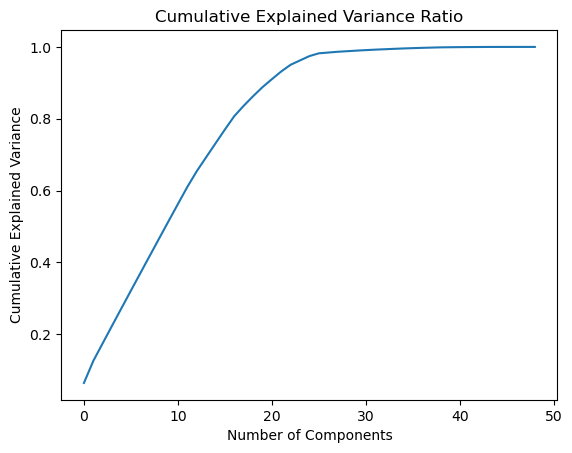

In [461]:
#Variance ratio
from sklearn.decomposition import PCA

# Assuming X is your data matrix
pca = PCA()
X_tr_pca = pca.fit_transform(X_tr)
X_val_pca = pca.fit_transform(X_val)
X_test_pca = pca.fit_transform(test_df_scaled.drop(columns=['CustomerID']))

# Calculate the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Plot the cumulative explained variance ratio
plt.plot(np.cumsum(explained_variance_ratio))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance Ratio')
plt.show()

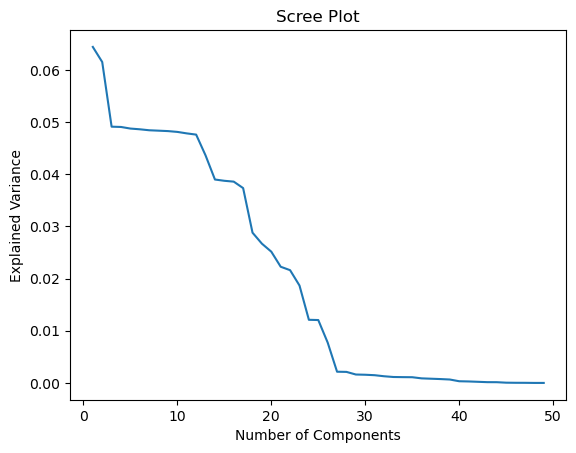

In [463]:
# Plot the scree plot
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_)
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')

plt.title('Scree Plot')
plt.show()

### Example prediction submission:

The code below is a very naive prediction method that simply predicts churn using a Dummy Classifier. This is used as just an example showing the submission format required. Please change/alter/delete this code below and create your own improved prediction methods for generating `prediction_df`.

**Dummy Classifier**

In [465]:
dummy_clf = DummyClassifier(strategy="stratified")

# Fit a dummy classifier on the selected feature columns
dummy_clf.fit(X_tr_pca, y_tr)

# Make predictions on the validation data
predicted_probability = dummy_clf.predict_proba(X_val_pca)[:, 1]

# Calculate the ROC AUC Score
roc_auc = roc_auc_score(y_val, predicted_probability)
print(f"ROC AUC Score for Dummy Classifier: {roc_auc:.4f}")


ROC AUC Score for Dummy Classifier: 0.4976


In [467]:
# Save the result of the DummyCLassifier model in a DataFrame for future comparison
dummy_clf_result = pd.DataFrame({'Model': 'DummyClassifier val', 'ROC_AUC Score': roc_auc}, index=[0])
dummy_clf_result

,Model,ROC_AUC Score
0,DummyClassifier val,0.497595


**Random Forest model**

In [477]:
# Create RFE with the trained model
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.feature_selection import RFE

rf = RandomForestClassifier(class_weight="balanced_subsample", n_jobs=-1, random_state=42)

rfe = RFE(estimator=rf, n_features_to_select=28)


In [479]:
%timeit rfe.fit(X_tr, y_tr)

8min 55s ± 3.03 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
# Transform the data
X_tr_rfe = rfe.transform(X_tr)
X_val_rfe = rfe.transform(X_val)
print(X_tr_rfe)
print(X_val_rfe)


In [521]:
# Get the selected feature indices from RFE
selected_features = rfe.get_support(indices=True)

# Create a DataFrame using the reduced feature set array and the original feature names
X_tr_rfe_df = pd.DataFrame(X_tr_rfe, columns=X_tr.columns[selected_features])
X_val_rfe_df = pd.DataFrame(X_val_rfe, columns=X_val.columns[selected_features])

print(X_tr_rfe_df.info())
print(X_val_rfe_df.info())

In [487]:
#Create a dictionary of hyperparameters to tune
cv_params = {'max_depth': [5],
             'max_features': [0.5],
             'max_samples': [0.7],
             'min_samples_leaf': [5],
             'min_samples_split': [4],
             'n_estimators': [600],
             }
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

# Set up StratifiedKFold with 7 splits
stratified_kfold = StratifiedKFold(n_splits=7)

# Instantiate the GridSearchCV object
rf_cv = GridSearchCV(rf, cv_params, scoring=scoring, cv=stratified_kfold, refit='roc_auc', verbose=3)

In [ ]:
%timeit rf_cv.fit(X_tr_rfe, y_tr)

In [ ]:
from sklearn.metrics import precision_recall_curve

y_pred_probs = rf_cv.best_estimator.predict_proba(X_val_rfe)[:, 1]

In [ ]:
from sklearn.metrics import auc, precision_recall_curve
from sklearn.inspection import permutation_importance

# Make predictions on the training data
y_rf_pred_tr = rf_cv.best_estimator_.predict(X_tr_rfe)

print('Random Forest scoring on the training set:')
print('Accuracy Score:', accuracy_score(y_tr, y_rf_pred_tr))
print('Precision Score:', precision_score(y_tr, y_rf_pred_tr))
print('Recall Score:', recall_score(y_tr, y_rf_pred_tr))
print('F1 Score:', f1_score(y_tr, y_rf_pred_tr))
print('ROC AUC Score:', roc_auc_score(y_tr, y_rf_pred_tr))
print()

# Predict probabilities on the validation set
y_rf_pred_proba_val = rf_cv.best_estimator_.predict_proba(X_val_rfe)[:, 1]  # Predicted probabilities on the validation set

# Get precision-recall curve
precisions, recalls, thresholds = precision_recall_curve(y_val, y_rf_pred_proba_val)

f1_scores = np.zeros_like(thresholds)
for i in range(len(thresholds)):
    if precisions[i] + recalls[i] > 0:  # Check if precision + recall is greater than 0
        f1_scores[i] = 2 * (precisions[i] * recalls[i]) / (precisions[i] + recalls[i])
    else:
        f1_scores[i] = 0  # Set to 0 if both precision and recall are 0

plt.plot(thresholds, precisions[:-1], label="Precision")
plt.plot(thresholds, recalls[:-1], label="Recall")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision-Recall Curve vs Threshold")
plt.legend()
plt.show()

# Find the threshold that gives the highest F1 score
best_threshold = thresholds[np.argmax(f1_scores)]

print(f"Best threshold: {best_threshold}")


In [ ]:
# Adjust threshold
y_rf_pred_val = (y_rf_pred_proba_val >= best_threshold).astype(int)  # use the previosly calculated best threshold

rf_baseline_auc = roc_auc_score(y_val, y_rf_pred_val)

#Calculate permutation importance on the validation set for Random Forest
rf_permutation_importance = permutation_importance(rf_cv.best_estimator_, X_val_rfe, y_val, scoring='roc_auc', n_repeats=10, random_state=42)

# Store the results in a DataFrame and sort by importance
# Random Forest Permutation Importances
rf_importances_df = pd.DataFrame({'feature': X_val_rfe_df.columns,
                                  'importance_mean': rf_permutation_importance.importances_mean
                                  }).sort_values(by='importance_mean', ascending=False)

#Display the results in a sorted format
print("\nRandom Forest Permutation Importances (Validation Set):")
print(rf_importances_df.head(50))

print()
print()

#Calculate the scores for the Random Forest model on the validation set
print('Random Forest scoring on the validation set:')
print('Accuracy Score:', accuracy_score(y_val, y_rf_pred_val))
print('Precision Score:', precision_score(y_val, y_rf_pred_val))
print('Recall Score:', recall_score(y_val, y_rf_pred_val))
print('F1 Score:', f1_score(y_val, y_rf_pred_val))
print('ROC AUC Score:', roc_auc_score(y_val, y_rf_pred_val))

# Calculate precision, recall, and thresholds for validation set predictions
precision, recall, thresholds = precision_recall_curve(y_val, y_rf_pred_proba_val)

# Calculate AUC for the Precision-Recall curve
pr_auc = auc(recall, precision)

# Output the AUC-PR score
print(f'AUC-PR Score (validation set): {pr_auc}')

In [547]:
rf_cv.best_params_

{'max_depth': 5,
 'max_features': 0.5,
 'max_samples': 0.7,
 'min_samples_leaf': 5,
 'min_samples_split': 4,
 'n_estimators': 600}

ROC AUC Score for RF model on the validation data is much better than the same score for DummyClassifier on the same data.

In [549]:
# Save the result of the RF model in a DataFrame for future comparison
rf_cv_result = pd.DataFrame({'Model': 'RF val', 'ROC_AUC Score': roc_auc_score(y_val, y_rf_pred_val)}, index=[0])

# Join the results from DummyCLassifier and from Random Forest models for comparison
results = pd.concat([dummy_clf_result, rf_cv_result])
results

,Model,ROC_AUC Score
0,DummyClassifier val,0.497595
0,RF val,0.671485


In [ ]:
rf_importances_df

In [ ]:
# Plot the feature importances as a horizontal bar chart
plt.figure(figsize=(8, 10))
for index, value in enumerate(rf_importances_df['importance_mean']):
    plt.text(value, index, f'{value:.2f}', va='center')  # value is placed at the end of the bar
    
plt.barh(rf_importances_df['feature'], rf_importances_df['importance_mean'], color='skyblue')

plt.xlabel('ROC AUC')
plt.ylabel('Features')
plt.title('Random Forest Model Feature Importance')
    
plt.show()

**XGBoost model**

In [505]:
# Create a dictionary of hyperparameters to tune
cv_params = {'subsample': [0.6],
             'max_delta_step': [2],
             'max_depth': [4],
             'min_child_weight': [101],
             'learning_rate': [0.001],
             'n_estimators': [1500],
             'reg_alpha': [0.01],
             'reg_lambda': [0.01]
            }

scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

# Train a new XGBoost model with only the selected features
xgb = XGBClassifier(scale_pos_weight=scale_pos_weight, eval_metric='auc',
                    objective='binary:logistic', random_state=42)


# Set up StratifiedKFold with 7 splits
stratified_kfold = StratifiedKFold(n_splits=7)

# Instantiate the GridSearchCV object
xgb_cv = GridSearchCV(xgb, cv_params, scoring=scoring, cv=stratified_kfold, refit='roc_auc', verbose=3)


In [ ]:
%timeit xgb_cv.fit(X_tr_rfe, y_tr)

In [ ]:
from sklearn.metrics import auc, precision_recall_curve

# Make predictions on the training data
y_pred_tr = xgb_cv.best_estimator_.predict(X_tr_rfe)
print('XGBoost scoring on the training set:')
print('Accuracy Score:', accuracy_score(y_tr, y_pred_tr))
print('Precision Score:', precision_score(y_tr, y_pred_tr))
print('Recall Score:', recall_score(y_tr, y_pred_tr))
print('F1 Score:', f1_score(y_tr, y_pred_tr))
print('ROC AUC Score:', roc_auc_score(y_tr, y_pred_tr))
print()

# Predict probabilities on the validation set
y_xgb_pred_proba_val = xgb_cv.predict_proba(X_val_rfe)[:, 1]  # Predicted probabilities

# Get precision-recall curve
precisions, recalls, thresholds = precision_recall_curve(y_val, y_xgb_pred_proba_val)

f1_scores = np.zeros_like(thresholds)
for i in range(len(thresholds)):
    if precisions[i] + recalls[i] > 0:  # Check if precision + recall is greater than 0
        f1_scores[i] = 2 * (precisions[i] * recalls[i]) / (precisions[i] + recalls[i])
    else:
        f1_scores[i] = 0  # Set to 0 if both precision and recall are 0

plt.plot(thresholds, precisions[:-1], label="Precision")
plt.plot(thresholds, recalls[:-1], label="Recall")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision-Recall Curve vs Threshold")
plt.legend()
plt.show()

# Find the threshold that gives the highest F1 score
best_threshold = thresholds[np.argmax(f1_scores)]

print(f"Best threshold: {best_threshold}")

In [ ]:
# Adjust threshold
y_xgb_pred_val = (y_xgb_pred_proba_val >= best_threshold).astype(int)  # use the previosly calculated best threshold

xgb_baseline_auc = roc_auc_score(y_val, y_xgb_pred_val)

#Calculate permutation importance on the validation set for XQBoost
xqb_permutation_importance = permutation_importance(xgb_cv.best_estimator_, X_val_rfe, y_val, scoring='roc_auc', n_repeats=10, random_state=42)

# Store the results in a DataFrame and sort by importance
# XQBoost Permutation Importances
xgb_importances_df = pd.DataFrame({'feature': X_val_rfe_df.columns,
                                  'importance_mean': xgb_permutation_importance.importances_mean
                                  }).sort_values(by='importance_mean', ascending=False)

#Display the results in a sorted format
print("\nXQBoost Permutation Importances (Validation Set):")
print(xgb_importances_df.head(50))

print()
print()

#Calculate the scores for the Random Forest model on the validation set
print('XQBoost scoring on the validation set:')
print('Accuracy Score:', accuracy_score(y_val, y_rf_pred_val))
print('Precision Score:', precision_score(y_val, y_rf_pred_val))
print('Recall Score:', recall_score(y_val, y_rf_pred_val))
print('F1 Score:', f1_score(y_val, y_rf_pred_val))
print('ROC AUC Score:', roc_auc_score(y_val, y_rf_pred_val))

# Calculate precision, recall, and thresholds for validation set predictions
precision, recall, thresholds = precision_recall_curve(y_val, y_rf_pred_proba_val)

# Calculate AUC for the Precision-Recall curve
pr_auc = auc(recall, precision)

# Output the AUC-PR score
print(f'AUC-PR Score (validation set): {pr_auc}')

In [511]:
xgb_cv.best_params_

{'learning_rate': 0.001,
 'max_delta_step': 2,
 'max_depth': 4,
 'min_child_weight': 101,
 'n_estimators': 1500,
 'reg_alpha': 0.01,
 'reg_lambda': 0.01,
 'subsample': 0.6}

In [ ]:
xgb_importances_df

In [ ]:
# Plot the feature importances as a horizontal bar chart
plt.figure(figsize=(8, 10))
for index, value in enumerate(xgb_importances_df['importance_mean']):
    plt.text(value, index, f'{value:.2f}', va='center')  # value is placed at the end of the bar
    
plt.barh(xgb_importances_df['feature'], xgb_importances_df['importance_mean'], color='skyblue')

plt.xlabel('ROC AUC')
plt.ylabel('Features')
plt.title('XQBoost Model Feature Importance')
    
plt.show()

In [515]:
# Save the result of the XGBoost model in a DataFrame for future comparison
xgb_cv_result = pd.DataFrame({'Model': 'XGB val', 'ROC_AUC Score': roc_auc_score(y_val, y_xgb_pred_val)}, index=[0])


In [517]:
# Add the result to the results from the DummyCLassifier and from the Random Forest models for comparison
results = pd.concat([dummy_clf_result, rf_cv_result, xgb_cv_result])
results

,Model,ROC_AUC Score
0,DummyClassifier val,0.497595
0,RF val,0.647208
0,XGB val,0.638682


In [ ]:
# Use SMOTE to oversample the churn class
#from imblearn.over_sampling import SMOTE
#from collections import Counter

# Original class distribution
#print(f"Original class distribution: {Counter(y_train)}")

# Apply SMOTE with a custom ratio
#smote = SMOTE(sampling_strategy=0.25, random_state=42)  # 0.7 means minority class will be 60% of majority class
#X_tr_resampled, y_tr_resampled = smote.fit_resample(X_tr, y_tr)

# New class distribution after SMOTE
#print(f"Resampled class distribution: {Counter(y_tr_resampled)}")


# Instantiate the XGBoost classifier
#xgb = XGBClassifier(scale_pos_weight=scale_pos_weight, eval_metric='auc',
#                    objective='binary:logistic', random_state=42)


# Set up StratifiedKFold with 5 splits
#stratified_kfold = StratifiedKFold(n_splits=6)

# Instantiate the GridSearchCV object
#xgb_cv = GridSearchCV(xgb, cv_params, scoring=scoring, cv=stratified_kfold, refit='roc_auc', verbose=3)


In [ ]:
#%timeit xgb_cv.fit(X_tr_resampled, y_tr_resampled)

In [ ]:
# Make predictions on the training data
#y_pred_tr = xgb_cv.best_estimator_.predict(X_tr_resampled)
#print('XGBoost scoring on the training set:')
#print('Accuracy Score:', accuracy_score(y_tr_resampled, y_pred_tr))
#print('Precision Score:', precision_score(y_tr_resampled, y_pred_tr))
#print('Recall Score:', recall_score(y_tr_resampled, y_pred_tr))
#print('F1 Score:', f1_score(y_tr_resampled, y_pred_tr))
#print('ROC AUC Score:', roc_auc_score(y_tr_resampled, y_pred_tr))

In [ ]:
#from sklearn.metrics import precision_recall_curve

# Predict probabilities
#y_pred_probs = xgb_cv.predict_proba(X_val)[:, 1]

# Get precision-recall curve
#precisions, recalls, thresholds = precision_recall_curve(y_val, y_pred_probs)

#f1_scores = np.zeros_like(thresholds)
#for i in range(len(thresholds)):
#    if precisions[i] + recalls[i] > 0:  # Check if precision + recall is greater than 0
#        f1_scores[i] = 2 * (precisions[i] * recalls[i]) / (precisions[i] + recalls[i])
#    else:
#        f1_scores[i] = 0  # Set to 0 if both precision and recall are 0

#plt.plot(thresholds, precisions[:-1], label="Precision")
#plt.plot(thresholds, recalls[:-1], label="Recall")
#plt.xlabel("Threshold")
#plt.ylabel("Score")
#plt.title("Precision-Recall Curve vs Threshold")
#plt.legend()
#plt.show()

# Find the threshold that gives the highest F1 score
#best_threshold = thresholds[np.argmax(f1_scores)]

#print(f"Best threshold: {best_threshold}")

In [144]:
# Make predictions on the validation data
#y_pred_val = xgb_cv.best_estimator_.predict(X_val)
#y_pred_xgb = y_pred_val

In [ ]:
#y_pred_proba_val = xgb_cv.predict_proba(X_val)[:, 1]  # Predicted probabilities

# Adjust threshold
#y_pred_val = (y_pred_proba_val >= 0.6).astype(int)  # use the previosly calculated best threshold

#Calculate the scores for the XGBoost model on the validation set
#print('XGBoost scoring on the validation set:')
#print('Accuracy Score:', accuracy_score(y_val, y_pred_val))
#print('Precision Score:', precision_score(y_val, y_pred_val))
#print('Recall Score:', recall_score(y_val, y_pred_val))
#print('F1 Score:', f1_score(y_val, y_pred_val))
#print('ROC AUC Score:', roc_auc_score(y_val, y_pred_val))

# Calculate the proportion of positive class instances
#positive_proportion = np.mean(y_val)

# Create random predictions based on the positive proportion
#y_pred_random = np.random.choice([0, 1], size=len(y_val), p=[1 - positive_proportion, positive_proportion])

# Calculate the ROC AUC score for the random model
#random_roc_auc = roc_auc_score(y_val, y_pred_random)

# Compare with your XGBoost model's ROC AUC score
#print("XGBoost ROC AUC on the validation set:", roc_auc_score(y_val, y_pred_val))
#print("Random Guess ROC AUC:", random_roc_auc)

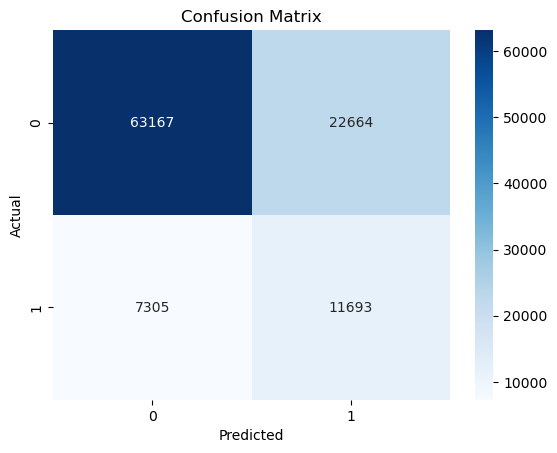

In [158]:
#Plot Confusion Matrix

# Calculate the confusion matrix
cm = confusion_matrix(y_val, y_pred_val)

# Create a heatmap visualization
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

From the above results, it is clear that XGBoost model is the champion model on the validation data.
Therefore, I'll train it on the test data to get the ultimate predictions and roc_auc_score.
I'll also train the RF model it on on the test data to get the ultimate predictions and roc_auc_score, for comparison purposes.

In [5510]:
from sklearn.calibration import CalibratedClassifierCV

calibrated_model = CalibratedClassifierCV(xgb_cv, method='isotonic')  # or method='sigmoid' for Platt scaling
calibrated_model.fit(X_tr, y_tr)

# Get calibrated probabilities
calibrated_probs = calibrated_model.predict_proba(X_val)[:, 1]
y_calibrated_pred = (calibrated_probs >= threshold).astype(int)

Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits


In [5512]:
print('XGBoost scoring on the validation set with calibrated_probs:')
print('Accuracy Score:', accuracy_score(y_val, y_calibrated_pred))
print('Precision Score:', precision_score(y_val, y_calibrated_pred))
print('Recall Score:', recall_score(y_val, y_calibrated_pred))
print('F1 Score:', f1_score(y_val, y_calibrated_pred))
print('ROC AUC Score:', roc_auc_score(y_val, y_calibrated_pred))


XGBoost scoring on the validation set with calibrated_probs:
Accuracy Score: 0.8239895448778487
Precision Score: 0.585763562245218
Recall Score: 0.09832613959364143
F1 Score: 0.16838689322576283
ROC AUC Score: 0.541467714971641


In [5514]:
from sklearn.model_selection import cross_val_score

# Example: Perform cross-validation with your model using the new threshold
cross_val_scores = cross_val_score(calibrated_model, X_tr, y_tr, cv=4, scoring='roc_auc')
print(f"Cross-validated AUC scores: {cross_val_scores}")

Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fi

In [3671]:
# Use XGBoost model to predict on test data
y_pred = xgb_cv.predict(test_df_encoded.drop(columns=['CustomerID']))  # For classification

y_pred_proba = xgb_cv.predict_proba(test_df_encoded.drop(columns=['CustomerID']))[:, 1]  # For probabilities

print(y_pred_proba)

# Combine predictions with label column into a dataframe
xgb_prediction_df = pd.DataFrame({'CustomerID': test_df_encoded[['CustomerID']].values[:, 0],
                             'predicted_probability': y_pred_proba})

# Ensure 'prediction_df' contains 104,480 rows and 2 columns 'CustomerID' and 'predicted_probaility'
print(xgb_prediction_df.shape)
print(xgb_prediction_df.head())



[0.29925093 0.2031704  0.88001525 ... 0.5458297  0.7166597  0.27933097]
(104480, 2)
   CustomerID  predicted_probability
0  O1W6BHP6RM               0.299251
1  LFR4X92X8H               0.203170
2  QM5GBIYODA               0.880015
3  D9RXTK2K9F               0.079411
4  ENTCCHR1LR               0.351819


In [ ]:
# Use Random Forest model to predict on test data
#X_test = test_df_encoded.drop(['CustomerID'], axis=1)

# Make predictions on the test set
y_pred = rf_cv.predict(X_test)  # For classification
y_pred_proba = rf_cv.predict_proba(X_test)  # For probabilities

# Combine predictions with label column into a dataframe
rf_prediction_df = pd.DataFrame({'CustomerID': test_df_encoded[['CustomerID']].values[:, 0],
                             'predicted_probability': y_pred})

# Ensure 'prediction_df' contains 104,480 rows and 2 columns 'CustomerID' and 'predicted_probaility'
print(rf_prediction_df.shape)
rf_prediction_df.head()
rf_prediction_df['predicted_probability'].value_counts(normalize=True)

**PLEASE CHANGE CODE BELOW TO IMPLEMENT YOUR OWN PREDICTIONS**

In [3919]:
### PLEASE CHANGE THIS CODE TO IMPLEMENT YOUR OWN PREDICTIONS

# Fit a dummy classifier on the feature columns in train_df:
dummy_clf = DummyClassifier(strategy="stratified")
dummy_clf.fit(train_df.drop(['CustomerID', 'Churn'], axis=1), train_df.Churn)

DummyClassifier(strategy='stratified')

In [3943]:
### PLEASE CHANGE THIS CODE TO IMPLEMENT YOUR OWN PREDICTIONS

# Use our dummy classifier to make predictions on test_df using `predict_proba` method:
predicted_probability = dummy_clf.predict_proba(test_df.drop(['CustomerID'], axis=1))[:, 1]
predicted_probability

array([0., 0., 0., ..., 0., 0., 0.])

In [3945]:
### PLEASE CHANGE THIS CODE TO IMPLEMENT YOUR OWN PREDICTIONS

# Combine predictions with label column into a dataframe
prediction_df = pd.DataFrame({'CustomerID': test_df[['CustomerID']].values[:, 0],
                             'predicted_probability': predicted_probability})

In [3949]:
### PLEASE CHANGE THIS CODE TO IMPLEMENT YOUR OWN PREDICTIONS

# View our 'prediction_df' dataframe as required for submission.
# Ensure it should contain 104,480 rows and 2 columns 'CustomerID' and 'predicted_probaility'
print(prediction_df.shape)
print(prediction_df.head(10))
prediction_df['predicted_probability'].value_counts(normalize=True)

(104480, 2)
   CustomerID  predicted_probability
0  O1W6BHP6RM                    0.0
1  LFR4X92X8H                    0.0
2  QM5GBIYODA                    0.0
3  D9RXTK2K9F                    0.0
4  ENTCCHR1LR                    0.0
5  7A88BB5IO6                    0.0
6  70OMW9XEWR                    0.0
7  EL1RMFMPYL                    1.0
8  4IA2QPT6ZK                    0.0
9  AEDCWHSJDN                    0.0


predicted_probability
0.0    0.817841
1.0    0.182159
Name: proportion, dtype: float64

**PLEASE CHANGE CODE ABOVE TO IMPLEMENT YOUR OWN PREDICTIONS**

## Final Tests - **IMPORTANT** - the cells below must be run prior to submission

Below are some tests to ensure your submission is in the correct format for autograding. The autograding process accepts a csv `prediction_submission.csv` which we will generate from our `prediction_df` below. Please run the tests below an ensure no assertion errors are thrown.

In [ ]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

# Writing to csv for autograding purposes
prediction_df.to_csv("prediction_submission.csv", index=False)
submission = pd.read_csv("prediction_submission.csv")

assert isinstance(submission, pd.DataFrame), 'You should have a dataframe named prediction_df.'

In [ ]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

assert submission.columns[0] == 'CustomerID', 'The first column name should be CustomerID.'
assert submission.columns[1] == 'predicted_probability', 'The second column name should be predicted_probability.'

In [ ]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

assert submission.shape[0] == 104480, 'The dataframe prediction_df should have 104480 rows.'

In [ ]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

assert submission.shape[1] == 2, 'The dataframe prediction_df should have 2 columns.'

In [ ]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

## This cell calculates the auc score and is hidden. Submit Assignment to see AUC score.

## SUBMIT YOUR WORK!

Once we are happy with our `prediction_df` and `prediction_submission.csv` we can now submit for autograding! Submit by using the blue **Submit Assignment** at the top of your notebook. Don't worry if your initial submission isn't perfect as you have multiple submission attempts and will obtain some feedback after each submission!